## Life expectancy data - Exploration & Modeling

### Table of contents

1. [Introduction](#introduction)
2. [Dataset](#dataset)
3. [Preprocessing data](#preprocessing)\
    &emsp;3.1. [Missing data analysis](#missingData)\
    &emsp;3.2. [Fixes to missing data](#missingDataFixes)\
    &emsp;3.3. [Remove duplicate data](#duplicateData)\
    &emsp;3.4. [Handle outlier data](#outlierData)\
    &emsp;3.5. [Normalize data](#normalizeData)\
    &emsp;3.6. [Key series identification](#keySeriesId)\
    &emsp;3.7. [Handle multicollinearity](#multicollinearity)
4. [Statistical summary](#statisticalSummary)\
    &emsp;4.1. [Measures of central tendency](#centralTendency)\
    &emsp;4.2. [Measures of spread](#spread)
5. [Data visualization](#dataViz)
6. [Baseline model](#baseline)
7. [Linear Regression model](#mlModel)\
    &emsp;7.1. [Building the model](#modelBuilding)\
    &emsp;7.2. [Model validation](#validation)\
    &emsp;&emsp;7.2.1. [Metrics assessment](#metricsAssessment)\
    &emsp;&emsp;7.2.2. [Cross validation](#crossValidation)\
    &emsp;&emsp;7.2.3. [Residual analysis](#residualAnalysis)\
    &emsp;7.3.[Feature engineering](#featureEngineering)\
    &emsp;&emsp;7.3.1. [Polynomial features](#polynomialFeatures)\
    &emsp;&emsp;7.3.2. [Categorical encoding](#categoricalEncoding)
8. [Regularized regression models](#rrModels)\
    &emsp;8.1. [Ridge regression with cross validation](#ridgeRegression)\
    &emsp;8.2. [Lasso regression with cross validation](#lassoRegression)\
    &emsp;8.3. [SGD regressor ](#sgdRegressor)
9. [Support vector machine](#svr)
10. [K-Nearest Neighbor](#knn)
11. [Tree based models and ensembles](#treeModels)\
    &emsp;11.1. [Decision tree](#decisionTree)\
    &emsp;11.2. [Random forest](#randomForest)\
    &emsp;11.3. [Gradient boosting machine](#gbm)\
    &emsp;11.4. [XGBoost regression](#xgboost)\
    &emsp;11.5. [LightGBM regression](#lightgbm)
13. [Feedforward neural network](#fnn)
14. [Results](#evaluation)
15. [References](#references)


## 1. Introduction <a name="introduction"></a>

Domain: Health Policy and Planning

**Objectives**

1. Identify key factors that impact life expectancy
2. Determine if vaccination coverage ((Hepatitis B, Polio, Diphtheria) contributes to higher life expectancy
3. Determine if a relationship exists between nutritional indicators (BMI, thinness) and life expectancy
4. Discover if alcohol consumption adversely affects life expectancy
5. Determine if education(schooling) has an impact on longevity
6. Identify if a relationship exists between life expectancy and a country's GDP
7. Determine if HIV/AIDS deaths in children significantly affects a country's life expectancy

## 2. Dataset <a name="dataset"></a>

**2.1. Dataset description**

This dataset contains 2 columns containing textual information.
- Name: a country's name
- Status: a country's economic class (Developed or Developing status). 

The dataset also contains several numerical columns:

- Year: the year that the data was observed
- Life expectancy: the number of years that an average person can be expected to live
- Adult Mortality: this is the probability that a person aged 15 years old will die before they reach the age of 60 (in a population per 1000 people)
- Infant deaths: the number of infant deaths (in a population per 1000 people)
- Alcohol: pure alcohol consumption per capita of persons aged over 15 in Litres
- percentage expenditure: the percentage of a country's GDP per capita expended on healthcare
- Hepatitis B: the percentage of Hepatitis B immunization among children aged 1 year old
- Measles: the number of Measles cases reported (in a population per 1000 people)
- BMI: the average body mass index value of the country's population
- under-five deaths: the number of deaths (in a population per 1000 people) of children under 5 years of age
- Polio: the percentage of Polio immunization among children aged 1 year old
- Total expenditure: the percentage of total government expenditure allocated to general healthcare expenditure.
- Diphtheria: the percentage of Diphtheria, Tetanus, Toxoid, Prtussis (DTP3) immunization among children aged 1 year old
- HIV/AIDS: the number of HIV/AIDS deaths (per 1000 live births) of children under 4 years of age.
- GDP: the Gross Domestic Product value per capita calculated in USD
- Population: the country's population
- thinness 1-19 years: the percentage thinness of children aged between 1 and 19 years
- thinness 5-9 years: the percentage thinness of children aged between 5 and 9 years
- Income composition of resources: the Human Development Index value (0-1) in reference to a country's configuration of resources
- Schooling: the mean number of years of schooling

Reading in the Life Expectancy csv file as a pandas DataFrame,

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np
# Data visuslization and specialty libraries
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from seaborn import heatmap, jointplot
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import rfpimp
# Machine learning libraries
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [2]:
# Creating pandas DataFrame
life_expectancy_df = pd.read_csv("Life_Expectancy_Data.csv")

# Observing the first 5 rows of the DataFrame
life_expectancy_df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

**2.2. Dataset size**

In [3]:
# Printing number of rows, columns
life_expectancy_df.shape

(2938, 22)

It can be seen that the dataset has 2938 rows and 22 columns.

**2.3. Data types**

Checking the data types of the dataset columns,

In [4]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

It can be seen that this dataset contains data columns of type float64, int64 and object.

**2.4. Basic summary statistics**

We can get the basic summary statistics for every numerical column using the pandas describe method. This provides the mean, standard deviation, quartiles, minimum and maximum values for the data columns.

This 'count' row gives us the counts of non-missing values in the columns.

In [5]:
life_expectancy_df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

When checking the above summary statistics, it can be seen that the values for the 'BMI' column are unrealistic.

Therefore this column must be dropped before continuing,

In [6]:
# Make copy of the dataframe before making changes
life_expectancy_data = life_expectancy_df.copy()

# Drop column 'BMI'
life_expectancy_data = life_expectancy_data.drop(' BMI ', axis=1)

## 3. Preprocessing <a name="preprocessing"></a>

The data is in First Normal Form (1NF). The dataset has a flat structure, each row is uniquely identifiable, every column represents only one feature of the dataset and every column contains atomic values.

In [7]:
# Printing the first 5 rows of the DataFrame
life_expectancy_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 21 columns]

Getting rid of the white spaces in the column names,

In [8]:
# Make copy of the dataframe before making changes
life_expectancy = life_expectancy_data.copy()

# Dictionary mapping old column names to new column names
new_column_names = {
    'Country': 'country',
    'Year': 'year',
    'Status': 'status',
    'Life expectancy ': 'life_expectancy',
    'Adult Mortality': 'adult_mortality',
    'infant deaths': 'infant_deaths',
    'Alcohol': 'alcohol',
    'percentage expenditure': 'percentage_expenditure',
    'Hepatitis B': 'hepatitis_b',
    'Measles ': 'measles',
    'under-five deaths ': 'under_five_deaths',
    'Polio': 'polio',
    'Total expenditure': 'total_expenditure',
    'Diphtheria ': 'diphtheria',
    ' HIV/AIDS': 'HIV_AIDS',
    'GDP': 'GDP',
    'Population': 'population',
    ' thinness  1-19 years': 'thinness_1-19_years',
    ' thinness 5-9 years': 'thinness_5-9_years',
    'Income composition of resources': 'income_composition_of_resources',
    'Schooling': 'schooling',
}

# Rename columns
life_expectancy.rename(columns=new_column_names, inplace=True)

# Check column names
life_expectancy.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'HIV_AIDS', 'GDP', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

### 3.1. Missing data analysis <a name="missingData"></a>

Getting the counts of missing data in every column,

In [9]:
life_expectancy.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
HIV_AIDS                             0
GDP                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

Now that the missing value counts have been obtained, they can be analysed further.

**3.1.1. missingno matrix visualization**

missingno is a library that allows users to create useful visualizatipns to study missing data values in a dataset.

Using the missingno library to create a visualization to look for patterns in the missing data,

The colored bars show non-missing values while the white bars show missing values. This can be useful to look for clusters of missing data in the dataset and spot any patterns.

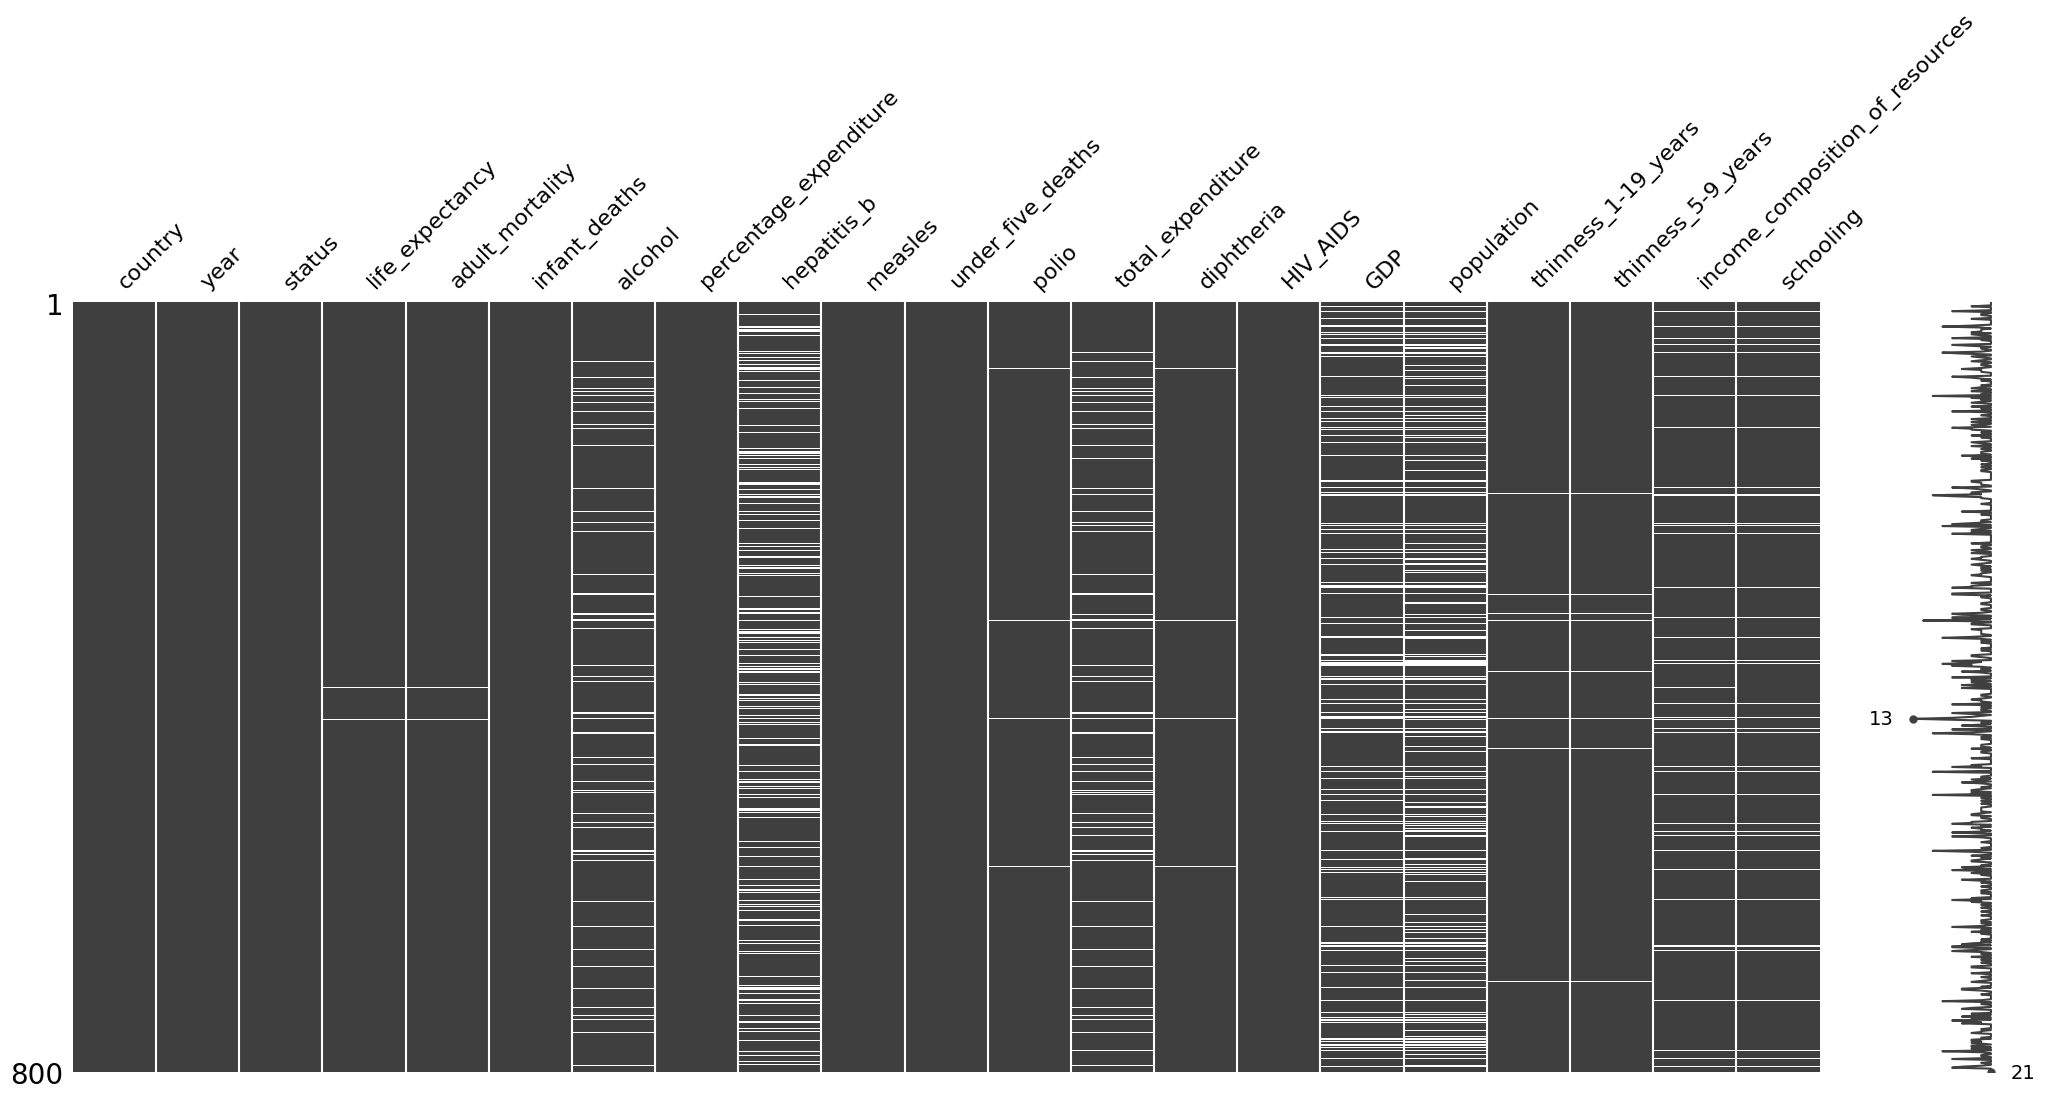

In [10]:
# Create the missingno matrix
msno.matrix(life_expectancy.sample(800))

# Show the plot
plt.show()

The author has only used 800 samples (less than half) of the dataset to try and spot any clear pattern.

The columns containing 'country', 'year', 'status', 'infant_deaths', 'percentage_expenditure', 'measles', 'under_five_deaths' and 'HIV_AIDS' appear to be complete, while the other columns show varying levels of spottiness.

The similar missing data patterns in 'life_expectancy' and 'adult_mortality' columns may mean that there is some reliationship in the missing data between them. The 'polio' and 'diphtheria' columns show some similarity in missingness, and the 2 'thinness' columns also show a similar missingness pattern.

Further, the missingness pattern in the 'alcohol' and 'total_expenditure' column shows some similarity too.

**3.1.2. missingno bar visualization**

The missingno library can be used again to visualize the percentages of missing data.
Shorter bars denote a higher missing percentage.

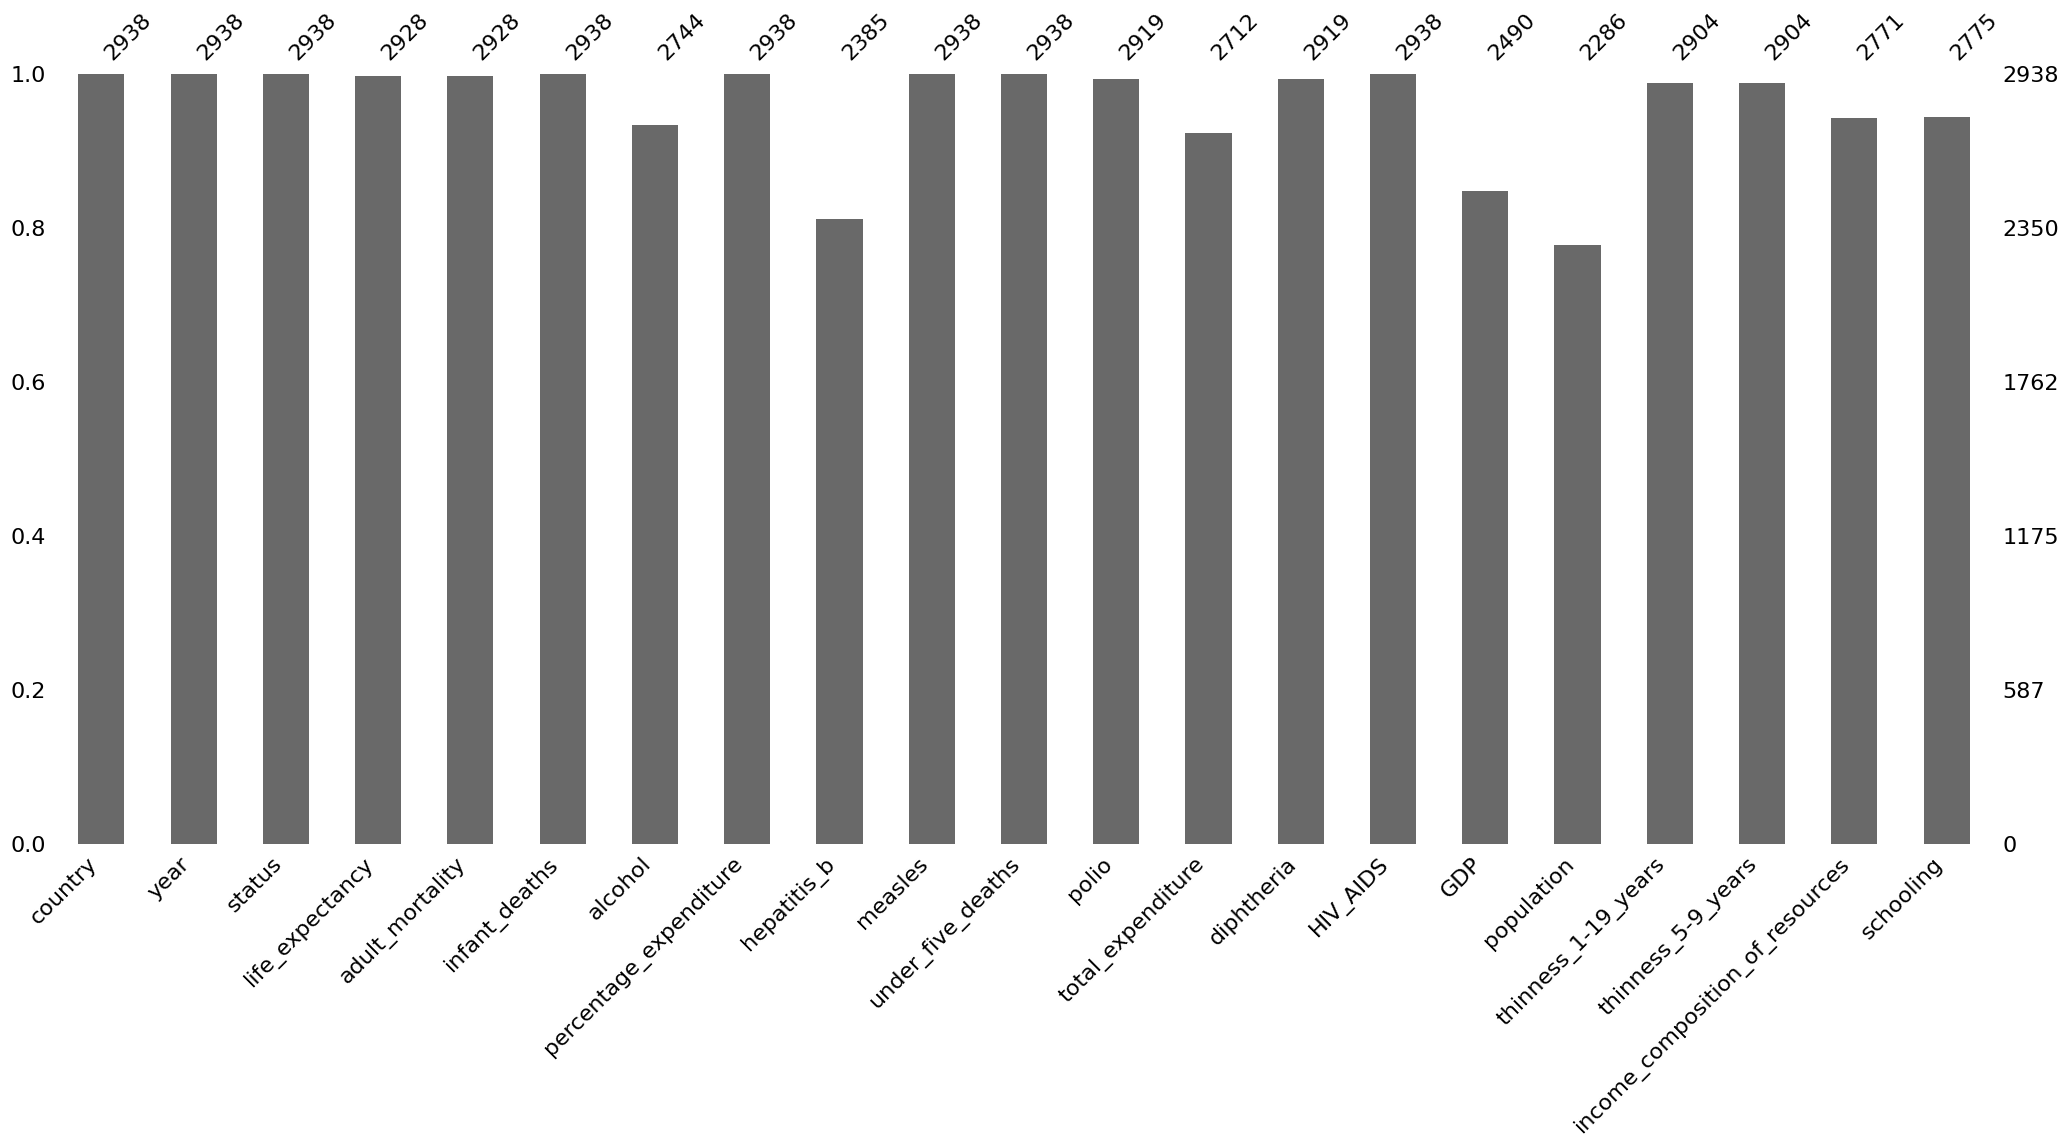

In [11]:
# Create the missingno barplot to get percents of nonmissing data
msno.bar(life_expectancy)

# Show the plot
plt.show()

It can be seen that the columns containing values for 'population', 'GDP' and 'hepatitis_b' have the largest percentages of missing data.

**3.1.3. missingno heatmap visualization**

Before attemptng to handle the missing values, the author will create a missingno heat map to find if there are correlations among columns with missing data.

The numbers in the missingno heat map denote the correlation coefficients between the missing values of 2 variables. The correlation coefficient is a measure of how strongly the missingness of a variable is connected to the missingness of another variable.

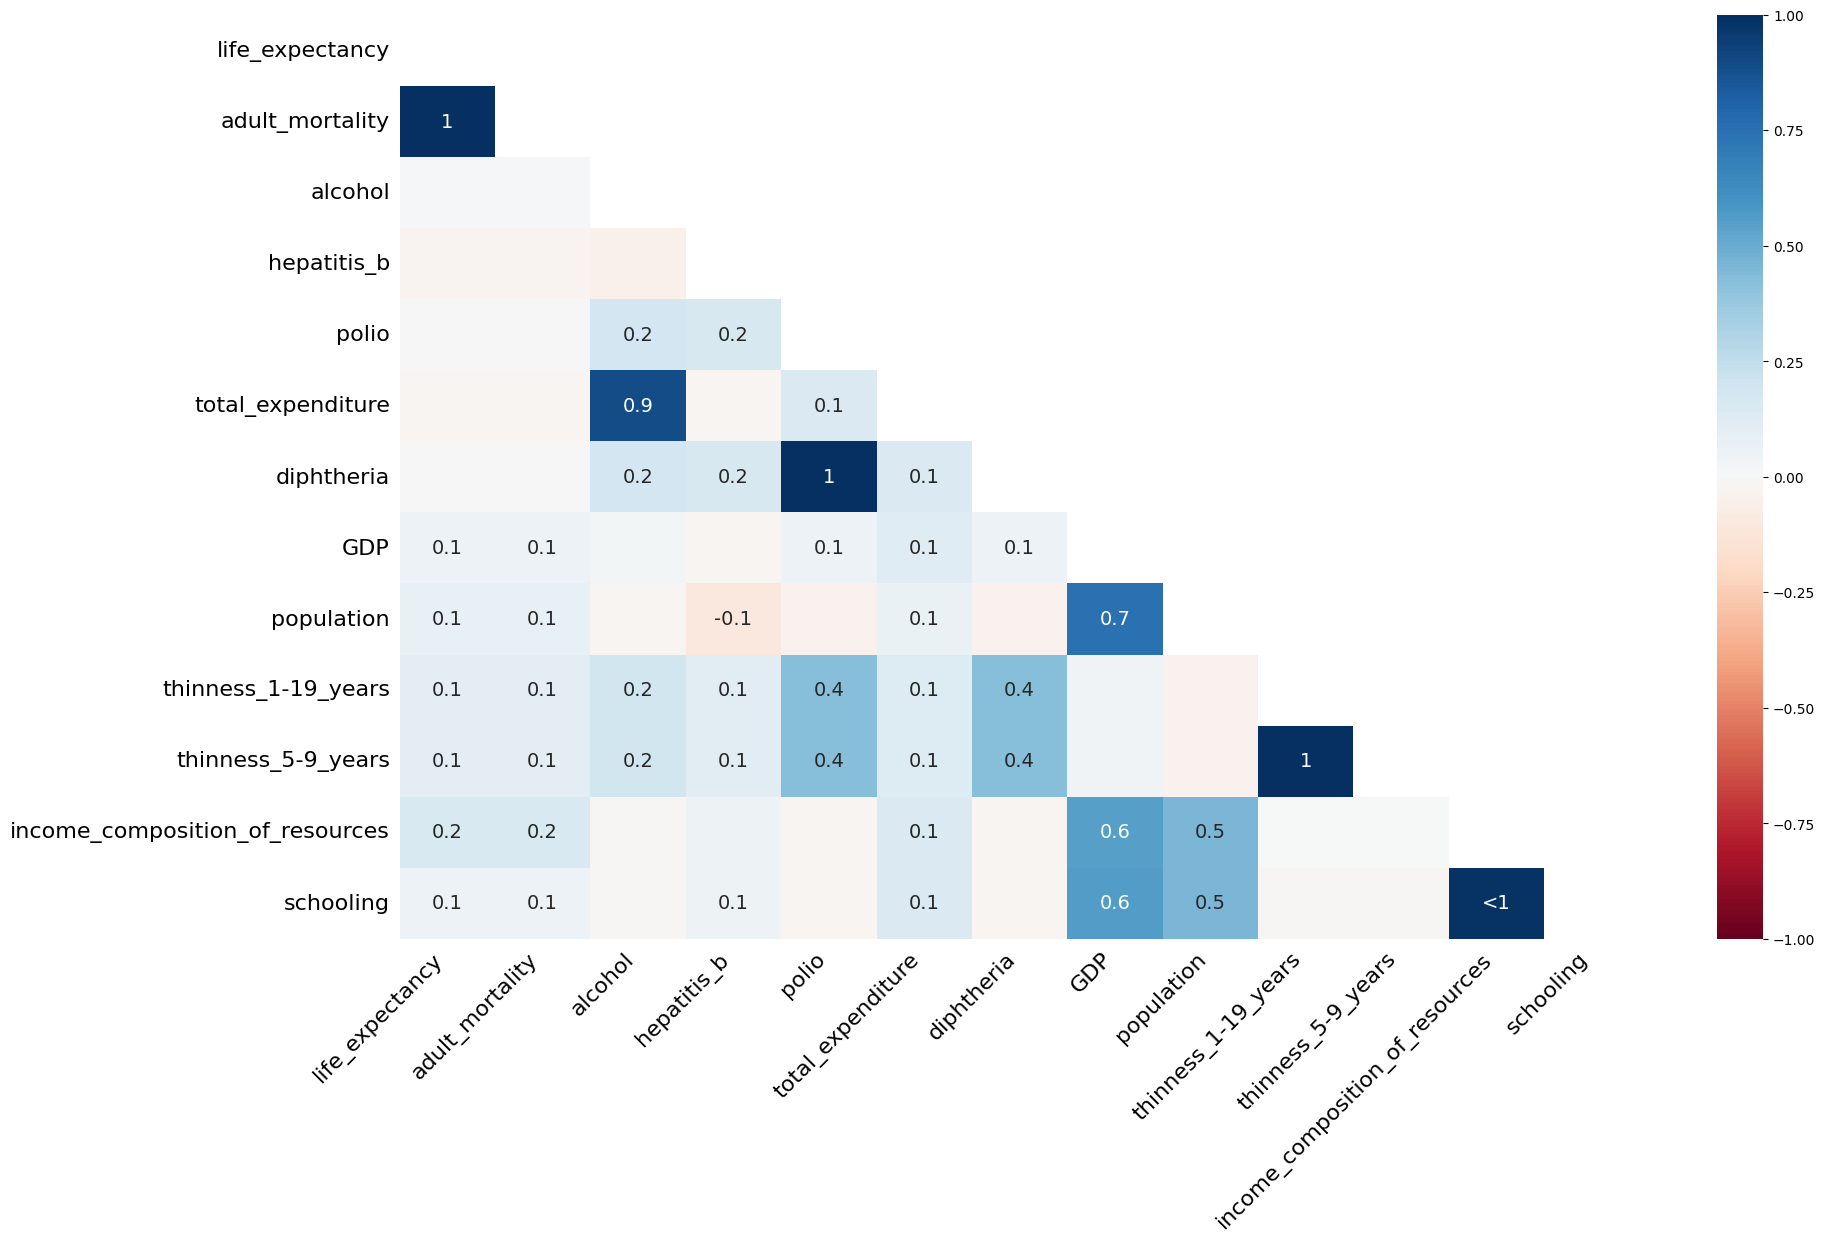

In [12]:
# Create heat map with missingno
msno.heatmap(life_expectancy)

# Show the plot
plt.show()

The above visualization shows that there is a perfect correlation between the missingness of 'adult_mortality' and 'life_expectancy' columns. It can also be observed that a strong correlation exists between the missingness of 'alcohol' and 'total_expenditure' columns.

There also appears to be a perfect correlation between the missingness of the 2 'thinness' columns.

### 3.2. Fixes to missing data <a name="missingDataFixes"></a>

The dataset contains data for countries for 16 years (2000 - 2015). Every country must have 16 data rows each.

The suthor will first remove any countries that have less than 16 data rows.

In [13]:
# Get value counts for the 'country' column
rows_per_country = life_expectancy['country'].value_counts()

# Get the countries that have less than 16 data rows
countries_less_data = rows_per_country[rows_per_country < 16].index

# Remove countries that have less than 16 data rows and store result in a new DataFrame
life_exp_df = life_expectancy[~life_expectancy['country'].isin(countries_less_data)]

# Checking the null value counts after removing countries with less than 16 data rows.
life_exp_df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        553
measles                              0
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
HIV_AIDS                             0
GDP                                443
population                         644
thinness_1-19_years                 32
thinness_5-9_years                  32
income_composition_of_resources    160
schooling                          160
dtype: int64

**3.2.1. Alcohol & total expenditure**

As observed in the missingno heatmap visualization in section 3.1.3., there is a strong positive correlation between the missingness of 'alcohol' and 'total_expenditure' columns.

Since the dataset has 16 data rows for each country, the NaN values in the 'alcohol' and 'total_expenditure' columns can be replaced with the mean values of column data belonging to the respective countries.

In [14]:
# Calculate the mean 'Alcohol' value for each country
mean_alcohol_val = life_exp_df.groupby('country')['alcohol'].mean()
# Calculate the mean 'Total expenditure' value for each country
mean_tot_exp_val = life_exp_df.groupby('country')['total_expenditure'].mean()

We can now create a function that replaces the NaN values in a column with the mean attribute value for every country,

In [15]:
# Function to replace a column's NaN values with the mean attribute value for that country
def replace_nan_with_mean(mean, df, column_name):
    """
    Replace NaN data with mean 
    Ex: if for a year for UK, GDP data is missing, replace that data with mean GDP of UK
    :param mean: mean for all countries
    :param df: data frame to mutate
    :param column_name: name of the column to check
    """
    # Replacing the NaN values in the given column by iterating over every row
    for index, row in df.iterrows():
        # Check if column_name value is a NaN
        if pd.isnull(row[column_name]):
            # Get the correct country name
            country = row['country']
            # Replace the NaN value with the mean '?' value of that country
            df.loc[index, column_name] = mean[country]

Using the new function to replace NaN values in 'alcohol' and 'total_expenditure' columns with the mean attribute value of that country,

In [16]:
# "Alcohol" column
replace_nan_with_mean(mean_alcohol_val, life_exp_df, 'alcohol')

# "Total expenditure" column
replace_nan_with_mean(mean_tot_exp_val, life_exp_df, 'total_expenditure')

# Remove any rows that still have NaN values in alcohol and total_expenditure columns
life_exp_df3 = life_exp_df.dropna(subset=['alcohol', 'total_expenditure'])

**3.2.2. Hepatitis B**

As noted in the previous section (Missing data analysis), the 'Hepatitis B' column hsa a considerable percentage of missing data (roughly 18.8 percent). The missingno heatmap showed no interesting correlation between the missingness of the 'Hepatitis B' column and other columns. The missingno matrix visualization also showed no clear pattern of missingness for the 'Hepatitis B' column.

We can try to replace the NaN values in this column with the mean 'Hepatitis B' value of its respective country,

In [17]:
# Calculate the mean 'Hepatitis B' value for each country
mean_hepB_val = life_exp_df3.groupby('country')['hepatitis_b'].mean()

# Replacing the NaN values in 'Hepatitis B' column with the mean by iterating over every row
replace_nan_with_mean(mean_hepB_val, life_exp_df3, 'hepatitis_b')

# Calculating the remaining NaN value counts for 'Hepatitis B' column
life_exp_df3['hepatitis_b'].isnull().sum()

144

It can be seen that there are 144 rows that still have NaN values in the 'hepatitis_b' column. We could drop these rows, but first the author will find out if the 'hepatitis_b' and 'life_expectancy' columns share a notable correlation,

In [18]:
# Computing the correlation between 'hepatitis b' and 'life expectancy' columns
corr_val = life_exp_df3[['life_expectancy', 'hepatitis_b']].corr()
corr_val

life_expectancy  hepatitis_b
life_expectancy         1.000000     0.291852
hepatitis_b             0.291852     1.000000

It can be seen that the correlation between the 2 columns is insignificant, and the 'hepatitis_b' column can be dropped.

Dropping the 'hepatitis_b' column,

In [19]:
# Drop column 'Hepatitis B'
life_exp_df4 = life_exp_df3.drop('hepatitis_b', axis=1)

# Checking the new percentages of missing column values,
life_exp_df4.isnull().mean() * 100

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.000000
adult_mortality                     0.000000
infant_deaths                       0.000000
alcohol                             0.000000
percentage_expenditure              0.000000
measles                             0.000000
under_five_deaths                   0.000000
polio                               0.277778
total_expenditure                   0.000000
diphtheria                          0.277778
HIV_AIDS                            0.000000
GDP                                14.097222
population                         21.250000
thinness_1-19_years                 0.555556
thinness_5-9_years                  0.555556
income_composition_of_resources     4.444444
schooling                           4.444444
dtype: float64

**3.2.3. Polio**

Handling missing 'polio' data,

In [20]:
# Calculate the mean 'polio' value for each country
mean_polio_val = life_exp_df4.groupby('country')['polio'].mean()

# Use replace_nan_with_mean function to replace NaN 'Polio' values with the mean 'Polio' of its respective country
replace_nan_with_mean(mean_polio_val, life_exp_df4, 'polio')

# Calculating the remaining NaN value count percentages
life_exp_df4.isnull().mean() * 100

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.000000
adult_mortality                     0.000000
infant_deaths                       0.000000
alcohol                             0.000000
percentage_expenditure              0.000000
measles                             0.000000
under_five_deaths                   0.000000
polio                               0.000000
total_expenditure                   0.000000
diphtheria                          0.277778
HIV_AIDS                            0.000000
GDP                                14.097222
population                         21.250000
thinness_1-19_years                 0.555556
thinness_5-9_years                  0.555556
income_composition_of_resources     4.444444
schooling                           4.444444
dtype: float64

It can be seen that there are no more missing 'Polio' values.

**3.2.4. GDP**

14% of values in the 'GDP' column are NaN values. We can attempt to replace some of these values with the mean 'GDP' values of their respective countries,

In [21]:
# Calculate the mean 'GDP' value for each country
mean_gdp_val = life_exp_df4.groupby('country')['GDP'].mean()

# Use replace_nan_with_mean function to replace NaN 'GDP' values with the mean 'GDP' of its respective country
replace_nan_with_mean(mean_gdp_val, life_exp_df4, 'GDP')

# Dropping rows that still have missing values for 'GDP'.
life_exp_df5 = life_exp_df4.dropna(subset=['GDP'])

# Getting the remaining NaN value counts
life_exp_df5.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                              0
percentage_expenditure               0
measles                              0
under_five_deaths                    0
polio                                0
total_expenditure                    0
diphtheria                           8
HIV_AIDS                             0
GDP                                  0
population                         228
thinness_1-19_years                 16
thinness_5-9_years                  16
income_composition_of_resources      0
schooling                            0
dtype: int64

**3.2.5. Population**

There are 228 NaN values in the 'Population' column. We can attempt to replace some of the NaN values with the mean 'Population' values of their respective countries,

In [22]:
# Calculate the mean 'Population' value for each country
mean_pop_val = life_exp_df5.groupby('country')['population'].mean()

# Use replace_nan_with_mean function to replace NaN 'Population' values with the mean 'Population' of its respective country
replace_nan_with_mean(mean_pop_val, life_exp_df5, 'population')

# Calculating the remaining NaN value count
life_exp_df5['population'].isnull().sum()

224

There are still 224 NaN values in the 'Population' column. Before removing any data, we can check the correlation value between 'Life expectancy' and 'Population',

In [23]:
# Computing the correlation between ''population' and 'life_expectancy' columns
corr_val = life_exp_df5[['life_expectancy', 'population']].corr()
corr_val

life_expectancy  population
life_expectancy         1.000000   -0.023137
population             -0.023137    1.000000

The correlation value is roughly -0.02, which means that the correlation between these 2 columns is not significant, and so the Population column can be dropped.

In [24]:
# Dropping 'Population' column
life_exp_df6 = life_exp_df5.drop('population', axis=1)

life_exp_df6.head()

country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  measles  under_five_deaths  \
0             62     0.01               71.279624     1154                 83   
1             64     0.01               73.523582      492                 86   
2             66     0.01               73.219243      430                 89   
3             69     0.01               78.184215     2787                 93   
4             71     0.01                7.097109     3013                 97   

   polio  total_expenditure  diphtheria  HIV_AIDS         GDP  \
0    6.0               8.16        65.0       0.1  584.259210   
1   58.0               8.18        62.0       0.1  612.696514   
2   62.0               8.13        64.0       0.1  631.744976   
3   67.0               8.52        67.0       0.1  669.959000   
4   68.0               7.87        68.0       0.1   63.537231   

   thinness_1-19_years  thinness_5-9_years  income_composition_of_resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

**3.2.6. Diphtheria**

Checking which rows have missing values for the 'diphtheria' column,

In [25]:
life_exp_df6[life_exp_df6['diphtheria'].isnull()].head()

country  year      status  life_expectancy  adult_mortality  \
1742  Montenegro  2005  Developing             73.6            133.0   
1743  Montenegro  2004  Developing             73.5            134.0   
1744  Montenegro  2003  Developing             73.5            134.0   
1745  Montenegro  2002  Developing             73.4            136.0   
1746  Montenegro  2001  Developing             73.3            136.0   

      infant_deaths   alcohol  percentage_expenditure  measles  \
1742              0  2.584286              527.307672        0   
1743              0  0.010000               57.121901        0   
1744              0  0.010000              495.078296        0   
1745              0  0.010000               36.480240        0   
1746              0  0.010000               33.669814        0   

      under_five_deaths  polio  total_expenditure  diphtheria  HIV_AIDS  \
1742                  0   84.3               8.46         NaN       0.1   
1743                  0   84.3               8.45         NaN       0.1   
1744                  0   84.3               8.91         NaN       0.1   
1745                  0   84.3               8.33         NaN       0.1   
1746                  0   84.3               8.23         NaN       0.1   

              GDP  thinness_1-19_years  thinness_5-9_years  \
1742  3674.617924                  2.3                 2.3   
1743   338.199535                  2.3                 2.4   
1744  2789.173500                  2.4                 2.4   
1745   216.243274                  2.5                 2.5   
1746   199.583957                  2.5                 2.6   

      income_composition_of_resources  schooling  
1742                            0.746       12.8  
1743                            0.740       12.6  
1744                            0.000        0.0  
1745                            0.000        0.0  
1746                            0.000        0.0

We can replace these NaN values with the mean 'diphtheria' values of their respective countries,

In [26]:
# Calculate the mean 'Diphtheria' value for each country
mean_dip_val = life_exp_df6.groupby('country')['diphtheria'].mean()

# Use replace_nan_with_mean function to replace NaN 'Diphtheria ' values with the mean 'Diphtheria ' of its respective country
replace_nan_with_mean(mean_dip_val, life_exp_df6, 'diphtheria')

# Calculating the remaining NaN value count
life_exp_df6['diphtheria'].isnull().sum()


0

Now there are no more NaN values in the 'diphtheria ' column.

**3.2.7. Thinness**

Checking which rows have missing values for the 'thinness  1-19 years' column,

In [27]:
life_exp_df6[life_exp_df6['thinness_1-19_years'].isnull()]

country  year      status  life_expectancy  adult_mortality  \
2457   Sudan  2015  Developing             64.1            225.0   
2458   Sudan  2014  Developing             63.8            229.0   
2459   Sudan  2013  Developing             63.5            232.0   
2460   Sudan  2012  Developing             63.2            235.0   
2461   Sudan  2011  Developing             62.7            241.0   
2462   Sudan  2010  Developing             62.5            243.0   
2463   Sudan  2009  Developing             62.0            248.0   
2464   Sudan  2008  Developing             61.8            251.0   
2465   Sudan  2007  Developing             61.4            254.0   
2466   Sudan  2006  Developing             61.0             26.0   
2467   Sudan  2005  Developing             67.0            261.0   
2468   Sudan  2004  Developing             59.7            278.0   
2469   Sudan  2003  Developing             59.6            278.0   
2470   Sudan  2002  Developing             59.4            277.0   
2471   Sudan  2001  Developing             58.9            283.0   
2472   Sudan  2000  Developing             58.6            284.0   

      infant_deaths  alcohol  percentage_expenditure  measles  \
2457             58    1.458                0.000000     3585   
2458             59    0.010              253.608651      676   
2459             60    0.010              227.835321     2813   
2460             61    0.010              220.522192     8523   
2461             61    2.120              196.689215     5616   
2462             62    1.770              172.009788      680   
2463             63    1.990               17.053693       68   
2464             64    2.010              128.636271      129   
2465             65    2.010               86.131669      327   
2466             66    1.900               60.336857      228   
2467             66    1.550               37.590396     1374   
2468             68    1.590               37.044800     9562   
2469             69    1.740               35.352647     4381   
2470             70    1.590               30.622875     4529   
2471             71    1.810               28.880697     4362   
2472             71    1.760               30.860010     2875   

      under_five_deaths  polio  total_expenditure  diphtheria  HIV_AIDS  \
2457                 85   93.0           5.695333        93.0       0.3   
2458                 86   94.0           8.430000        94.0       0.3   
2459                 88   93.0           8.420000        93.0       0.3   
2460                 89   92.0           8.200000        92.0       0.3   
2461                 91   93.0           8.300000        93.0       0.3   
2462                 92    9.0           7.970000         9.0       0.3   
2463                 94   81.0           8.400000        81.0       0.3   
2464                 95   85.0           8.170000        86.0       0.3   
2465                 97   84.0           4.720000        84.0       0.3   
2466                 99   77.0           3.930000        78.0       0.2   
2467                101   78.0           3.180000        78.0       0.2   
2468                102   74.0           3.390000        74.0       0.2   
2469                104   69.0           3.180000        69.0       0.2   
2470                106    6.0           2.950000         6.0       0.2   
2471                108   66.0           2.960000        66.0       0.2   
2472                109   62.0           3.230000        62.0       0.1   

              GDP  thinness_1-19_years  thinness_5-9_years  \
2457  2513.884661                  NaN                 NaN   
2458  2176.898290                  NaN                 NaN   
2459  1955.667990                  NaN                 NaN   
2460  1892.894352                  NaN                 NaN   
2461  1666.857757                  NaN                 NaN   
2462  1476.478870                  NaN                 NaN   
2463  1226.884381               

All 'thinness' values for Sudan are missing, so we are unable to calculate a mean value to replace this data. The Sudan rows will need to be removed.

In [28]:
# Store result in new DataFrame
life_exp_df7 = life_exp_df6[life_exp_df6['country'] != 'Sudan']

# Check if all missing values have been dealt with,
life_exp_df7.isnull().mean() * 100

country                            0.0
year                               0.0
status                             0.0
life_expectancy                    0.0
adult_mortality                    0.0
infant_deaths                      0.0
alcohol                            0.0
percentage_expenditure             0.0
measles                            0.0
under_five_deaths                  0.0
polio                              0.0
total_expenditure                  0.0
diphtheria                         0.0
HIV_AIDS                           0.0
GDP                                0.0
thinness_1-19_years                0.0
thinness_5-9_years                 0.0
income_composition_of_resources    0.0
schooling                          0.0
dtype: float64

Sanity check

In [29]:
#  isna() returns a dataframe with boolean values for all cells
#  now call any() to check if any column has missing values
#  final call to any() determines if any cell in the dataframe has missing values

life_exp_df7.isna().any().any() # Output 'False' means that there are no missing values

False

### 3.3. Remove duplicate data <a name="duplicateData"></a>

Check for any duplicate data records,

In [30]:
# Finding duplicate rows
life_expectancy[life_expectancy.duplicated()]

Empty DataFrame
Columns: [country, year, status, life_expectancy, adult_mortality, infant_deaths, alcohol, percentage_expenditure, hepatitis_b, measles, under_five_deaths, polio, total_expenditure, diphtheria, HIV_AIDS, GDP, population, thinness_1-19_years, thinness_5-9_years, income_composition_of_resources, schooling]
Index: []

[0 rows x 21 columns]

### 3.4. Handle outlier data <a name="outlierData"></a>

We can print out the summary statistics to check for extreme or unrealistic values,

In [31]:
# Summary statistics
life_exp_df7.describe()

year  life_expectancy  adult_mortality  infant_deaths  \
count  2480.000000      2480.000000      2480.000000    2480.000000   
mean   2007.500000        69.472863       160.880645      30.921371   
std       4.610702         9.598148       125.819455     126.778440   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2003.750000        63.500000        71.000000       0.000000   
50%    2007.500000        72.300000       137.000000       2.000000   
75%    2011.250000        76.000000       223.000000      18.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           alcohol  percentage_expenditure        measles  under_five_deaths  \
count  2480.000000             2480.000000    2480.000000        2480.000000   
mean      4.577629              873.373144    2338.379839          42.884274   
std       4.016903             2136.417700   11106.210149         172.351941   
min       0.010000                0.000000       0.000000           0.000000   
25%       0.850000               23.654806       0.000000           0.000000   
50%       3.885000              119.901020      15.000000           3.000000   
75%       7.560000              576.437462     334.000000          23.000000   
max      17.870000            19479.911610  212183.000000        2500.000000   

             polio  total_expenditure   diphtheria     HIV_AIDS  \
count  2480.000000        2480.000000  2480.000000  2480.000000   
mean     82.595657           5.858774    82.556624     1.880484   
std      23.232228           2.360683    23.403547     5.445718   
min       3.000000           0.370000     2.000000     0.100000   
25%      78.000000           4.230000    79.000000     0.100000   
50%      93.000000           5.730000    93.000000     0.100000   
75%      97.000000           7.470000    97.000000     0.800000   
max      99.000000          14.390000    99.000000    50.600000   

                 GDP  thinness_1-19_years  thinness_5-9_years  \
count    2480.000000          2480.000000         2480.000000   
mean     7515.414379             4.851976            4.893065   
std     14290.941591             4.486784            4.578324   
min         1.681350             0.100000            0.100000   
25%       464.218481             1.600000            1.600000   
50%      1784.657015             3.300000            3.300000   
75%      5943.664517             7.100000            7.100000   
max    119172.741800            27.700000           28.600000   

       income_composition_of_resources    schooling  
count                      2480.000000  2480.000000  
mean                          0.633245    12.138629  
std                           0.211592     3.329602  
min                           0.000000     0.000000  
25%                           0.494750    10.200000  
50%                           0.685000    12.400000  
75%                           0.787000    14.500000  
max                           0.948000    20.700000

Creating a function to get outlier data of a column (feature),

In [32]:
### Adapted from https://www.kaggle.com/discussions/general/218717#1200703

def get_outlier_data(df, feature):
    """
    Get outliers for a given feature (column name)
    :param df: Dataframe to check
    :param feature: column name of the feature in df
    :return: lower_quartile, upper_quartile, outlier_rows as a tuple
    """
    # Calculate the interquartile range
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Set lower and upper limits for outliers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Get outliers
    outliers = df[(df[feature] < lower) | (df[feature] > upper)]
    return lower, upper, outliers

We can now use the above function to look for outliers in the data.

Getting the outlier values in the Life expectancy column,

In [33]:
# Get outlier data points for life expectancy column using the newly created function
lower_life_exp, upper_life_exp, outliers_life_exp = get_outlier_data(life_exp_df7, 'life_expectancy')

print(lower_life_exp, upper_life_exp)
outliers_life_exp

44.75 94.75


country  year      status  life_expectancy  adult_mortality  \
1127         Haiti  2010  Developing             36.3            682.0   
1484       Lesotho  2005  Developing             44.5            675.0   
1582        Malawi  2003  Developing             44.6            613.0   
1583        Malawi  2002  Developing             44.0             67.0   
1584        Malawi  2001  Developing             43.5            599.0   
1585        Malawi  2000  Developing             43.1            588.0   
2306  Sierra Leone  2006  Developing             44.3            464.0   
2307  Sierra Leone  2005  Developing             43.3             48.0   
2308  Sierra Leone  2004  Developing             42.3            496.0   
2309  Sierra Leone  2003  Developing             41.5             57.0   
2311  Sierra Leone  2001  Developing             41.0            519.0   
2312  Sierra Leone  2000  Developing             39.0            533.0   
2920        Zambia  2001  Developing             44.6            611.0   
2921        Zambia  2000  Developing             43.8            614.0   
2932      Zimbabwe  2005  Developing             44.6            717.0   
2933      Zimbabwe  2004  Developing             44.3            723.0   
2934      Zimbabwe  2003  Developing             44.5            715.0   

      infant_deaths  alcohol  percentage_expenditure  measles  \
1127             23     5.76               36.292918        0   
1484              5     2.67               57.903698        0   
1582             43     1.08                4.375316      167   
1583             46     1.10                3.885395       92   
1584             48     1.15               12.797606      150   
1585             51     1.18               13.762702      304   
2306             30     3.80               38.000758       33   
2307             30     3.83               42.088929       29   
2308             30     3.99               38.524548        7   
2309             30     4.07               38.614732      586   
2311             30     4.21               33.346915      649   
2312             29     3.97               20.395683     3575   
2920             43     2.61               46.830275    16997   
2921             44     2.62               45.616880    30930   
2932             28     4.14                8.717409      420   
2933             27     4.36                0.000000       31   
2934             26     4.06                0.000000      998   

      under_five_deaths  polio  total_expenditure  diphtheria  HIV_AIDS  \
1127                 58   66.0               8.90        66.0       1.9   
1484                  6   88.0               6.30        89.0      34.8   
1582                 70   85.0               6.35        84.0      24.2   
1583                 75   79.0               4.82        64.0      24.7   
1584                 80   86.0               5.70         9.0      25.1   
1585                 84   73.0               6.70        75.0      25.5   
2306                 46   65.0               1.68        64.0       2.2   
2307                 47   67.0              12.25        65.0       2.2   
2308                 47   69.0              11.66        65.0       2.1   
2309                 47   66.0              11.69        73.0       1.9   
2311                 48   38.0              11.83        38.0       1.5   
2312                 48   46.0              13.63        44.0       1.2   
2920                 70   86.0               6.56        85.0      18.6   
2921                 72   85.0               7.16        85.0      18.7   
2932                 43   69.0               6.44        68.0      30.3   
2933                 42   67.0               7.13        65.0      33.6   
2934                 41    7.0               6.52        68.0      36.7   

             GDP  thinness_1-19_years  thinness_5-9_years  \
1127  662.279518                  4.0                 4.0   
1484  862.946312                  

The custom function can be modified so that extreme values will be replaced by the upper or lower bound value.

In [34]:
# Function to replace outliers
def replace_outliers(df, feature):
    """
    Replace outliers of df with lower and upper bound of the data
    :param df: data frame to mutate
    :param feature: feature's column name
    """
    # Calculate the interquartile range
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Set lower and upper limits for outliers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Replace small outlier values with lower bound
    df.loc[df[feature] < lower, feature] = lower
    # Replace the large outlier values with the upper_bound
    df.loc[df[feature] > upper, feature] = upper

The author will create a new DataFrame before replacing the outliers in the data,

In [35]:
# Create copy of DataFrame
life_exp_df8 = life_exp_df7.copy()

# Replace outliers in the 'life_expectancy' column
replace_outliers(life_exp_df8, 'life_expectancy')

We can check for outliers in the new DataFrame's 'Life expectancy' column by using the first function,

In [36]:
# Get outlier data points for life expectancy column using the newly created function
lower_life_exp, upper_life_exp, outliers_life_exp = get_outlier_data(life_exp_df8, 'life_expectancy')

print(lower_life_exp, upper_life_exp)
outliers_life_exp

44.75 94.75


Empty DataFrame
Columns: [country, year, status, life_expectancy, adult_mortality, infant_deaths, alcohol, percentage_expenditure, measles, under_five_deaths, polio, total_expenditure, diphtheria, HIV_AIDS, GDP, thinness_1-19_years, thinness_5-9_years, income_composition_of_resources, schooling]
Index: []

It can be seen that there are no more outlier data points in the 'life_expectancy' column.

We can now use the modified function to find and replace outlier data points in the other numeric columns as well.

In [37]:
# List of column names we can apply the outlier replacing function on
columns_to_iterate = ['adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 
                      'measles', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 
                      'HIV_AIDS', 'GDP', 'thinness_1-19_years', 'thinness_5-9_years', 
                      'income_composition_of_resources', 'schooling']

# Iterating over the remaining numeric columns
for col in columns_to_iterate:
    # Apply function to replace outliers
    replace_outliers(life_exp_df8, col)

Now there are no more outliers in the data.

### 3.5. Normalize data <a name="normalizeData"></a>

The author will normalize the numeric columns which will rescale the data to values between 0 and 1. Normalizing the data will preserve the shape of the original distribution while having all the features on a similar scale.

In [38]:
# Create a copy of the DataFrame before normalizing
life_exp_df9 = life_exp_df8.copy()

# Select numeric columns that need to be normalized
features = ['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 
            'measles', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 
            'HIV_AIDS', 'GDP', 'thinness_1-19_years', 'thinness_5-9_years', 
            'income_composition_of_resources', 'schooling']

# Using MinMaxScaler from sklearn library to normalize data
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Normalize the features
life_exp_df9[features] = scaler.fit_transform(life_exp_df9[features])

# Print the normalized dataset
life_exp_df9.head()

country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2015  Developing         0.457627         0.582222   
1  Afghanistan  2014  Developing         0.342373         0.600000   
2  Afghanistan  2013  Developing         0.342373         0.593333   
3  Afghanistan  2012  Developing         0.333333         0.602222   
4  Afghanistan  2011  Developing         0.326554         0.608889   

   infant_deaths  alcohol  percentage_expenditure   measles  \
0            1.0      0.0                0.050711  1.000000   
1            1.0      0.0                0.052307  0.589222   
2            1.0      0.0                0.052091  0.514970   
3            1.0      0.0                0.055623  1.000000   
4            1.0      0.0                0.005049  1.000000   

   under_five_deaths     polio  total_expenditure  diphtheria  HIV_AIDS  \
0                1.0  0.000000           0.651338    0.276596       0.0   
1                1.0  0.171717           0.653010    0.212766       0.0   
2                1.0  0.252525           0.648829    0.255319       0.0   
3                1.0  0.353535           0.681438    0.319149       0.0   
4                1.0  0.373737           0.627090    0.340426       0.0   

        GDP  thinness_1-19_years  thinness_5-9_years  \
0  0.041139                  1.0                 1.0   
1  0.043147                  1.0                 1.0   
2  0.044492                  1.0                 1.0   
3  0.047191                  1.0                 1.0   
4  0.004368                  1.0                 1.0   

   income_composition_of_resources  schooling  
0                         0.473994   0.374631  
1                         0.470629   0.368732  
2                         0.463900   0.362832  
3                         0.456049   0.356932  
4                         0.445955   0.339233

### 3.6. Key series identification <a name="keySeriesId"></a>

The key series of this dataset are the columns that contain the most useful data for predicting life expectancy. The author has used a seaborn heatmap to find out which columns show a notable correlation with the 'Life expectancy' column.

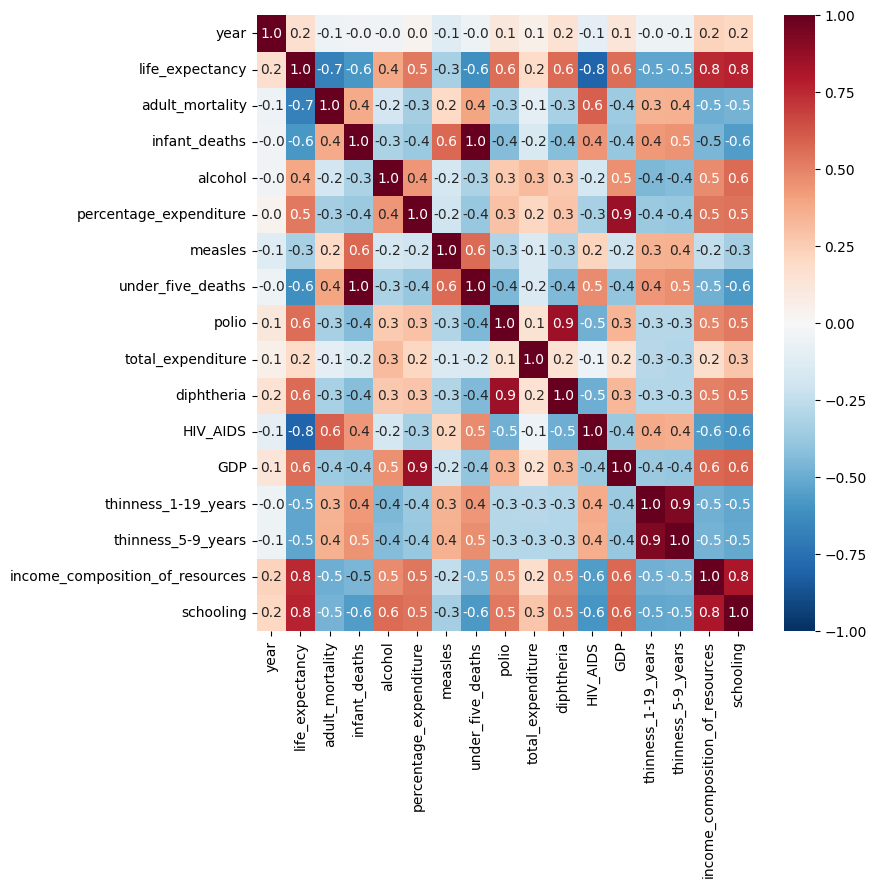

In [39]:
# Create seaborn heat map
fig, ax = plt.subplots(figsize=(8, 8))
ax = heatmap(life_exp_df9.corr(numeric_only=True), fmt=".1f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1)
plt.show()

We can drop the columns that share a collinearity value less than 0.5 with the 'Life expectancy' column.

In [40]:
# Dropping columns that have less than 0.5 collinearity with Life expectancy' and storing result in new DataFrame
# Also dropping categorical features for the present
life_exp_df10 = life_exp_df9.drop(
    ['country', 'year', 'status', 'alcohol', 'measles', 'total_expenditure'], axis=1)

### 3.7. Handle multicollinearity <a name="multicollinearity"></a>

It can be seen that some of the columns that are collinear with 'Life expectancy' are also highly collinear with each other. Such highly correlated columns can make a model difficult to interpret.

To visualize multicollinearity and decide what features we really need, we can create a dependence heat map by using the rfpimp package,

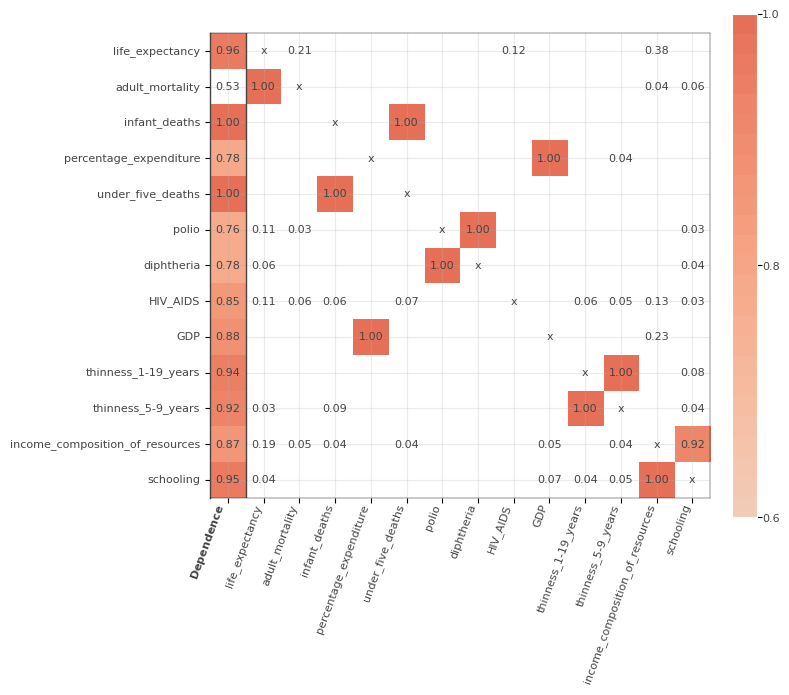

In [41]:
# FROM: O'Reilly Machine Learning Pocket Reference by Matt Harrison

# (Passing in a copy of the DataFrame, because the rfpimp library sometimes makes changes to the data)
rfpimp.plot_dependence_heatmap(rfpimp.feature_dependence_matrix(life_exp_df10.copy()), 
                               value_fontsize=8, 
                               label_fontsize=8, 
                               figsize=(8,8)
                              )

fig = plt.gcf()

From studying the above dependencies we can deduce that a few columns need to be removed.

We can remove either of the 'infant_deaths' or 'under_five_deaths' columns. We can also remove either of the 'GDP' or 'percentage_expenditure' columns. One of the 'thinness' columns can be removed. One of either 'schooling' or 'income composition of resources' columns can also be removed. We can remove one of 'diptheria' or 'polio' as well.

Removing columns that can disrupt feature importance,

In [42]:
# Remove columns and store result in new DataFrame
life_exp_df11 = life_exp_df10.drop(['infant_deaths', 'percentage_expenditure', 'thinness_5-9_years', 
                                    'diphtheria', 'income_composition_of_resources'], axis=1)

# Show first 5 rows
life_exp_df11.head()

life_expectancy  adult_mortality  under_five_deaths     polio  HIV_AIDS  \
0         0.457627         0.582222                1.0  0.000000       0.0   
1         0.342373         0.600000                1.0  0.171717       0.0   
2         0.342373         0.593333                1.0  0.252525       0.0   
3         0.333333         0.602222                1.0  0.353535       0.0   
4         0.326554         0.608889                1.0  0.373737       0.0   

        GDP  thinness_1-19_years  schooling  
0  0.041139                  1.0   0.374631  
1  0.043147                  1.0   0.368732  
2  0.044492                  1.0   0.362832  
3  0.047191                  1.0   0.356932  
4  0.004368                  1.0   0.339233

## 4. Statistical summary <a name="statisticalSummary"></a>

Now that the key series of the dataset have been identified, a statistical analysis can be performed.

### 4.1. Measures of central tendency <a name="centralTendency"></a>

**A. Mode** <a name="mode"></a>

Getting most frequent scores in every column,

In [43]:
life_exp_df11.mode()

life_expectancy  adult_mortality  under_five_deaths  polio  HIV_AIDS  GDP  \
0         0.638418              1.0                0.0    1.0       0.0  1.0   

   thinness_1-19_years  schooling  
0                  1.0   0.539823

**B. Mean** <a name="mean"></a>

Getting the mean values for each column,

In [44]:
# Mean values of normalized key series
life_exp_df11.mean()

life_expectancy        0.558996
adult_mortality        0.347673
under_five_deaths      0.263629
polio                  0.723043
HIV_AIDS               0.252800
GDP                    0.300779
thinness_1-19_years    0.301199
schooling              0.496333
dtype: float64

Visualizing the mean values for each column,

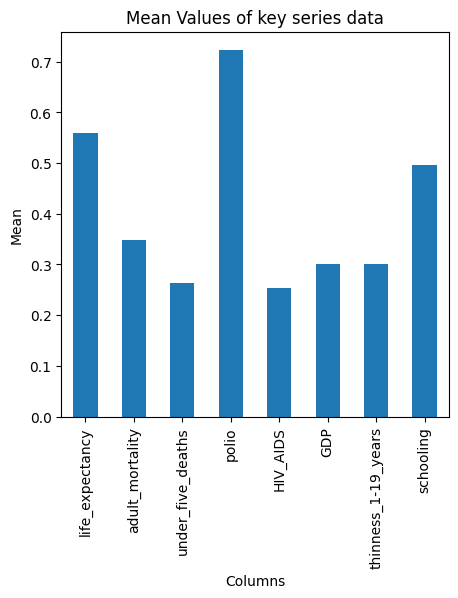

In [45]:
mean_vals = life_exp_df11.mean()

# Create a bar plot
mean_vals.plot(kind='bar', figsize=(5, 5))

# Set plot title and labels
plt.title('Mean Values of key series data')
plt.xlabel('Columns')
plt.ylabel('Mean')

# Show the plot
plt.show()

It can be seen that 'Polio' appears to have the highest mean value of the columns, and 'HIV_AIDS' has the lowest.

**C. Median (Second quartile)** <a name="median"></a>

Calculating the median value for every column,

In [46]:
# Median values of normalized key series
life_exp_df11.median()

life_expectancy        0.622599
adult_mortality        0.302222
under_five_deaths      0.052174
polio                  0.878788
HIV_AIDS               0.000000
GDP                    0.125906
thinness_1-19_years    0.209836
schooling              0.510324
dtype: float64

Visualizing the median values for each column,

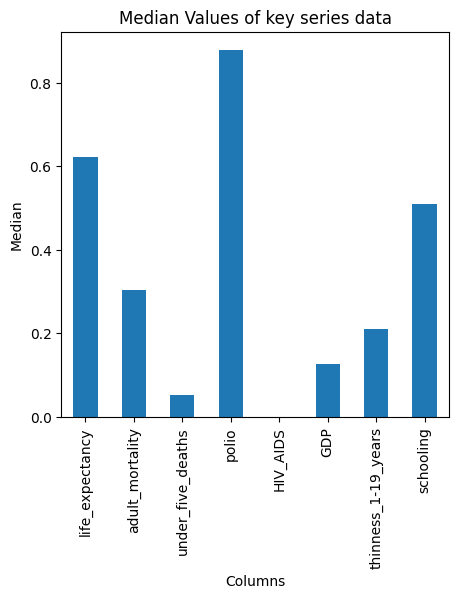

In [47]:
median_vals = life_exp_df11.median()

# Create a bar plot
median_vals.plot(kind='bar', figsize=(5, 5))

# Set plot title and labels
plt.title('Median Values of key series data')
plt.xlabel('Columns')
plt.ylabel('Median')

# Show the plot
plt.show()

It can be seen that 'Polio' also has the highest median value among the columns.

As 'Polio' has the highest median and mean, this means that this column has higher values than the other columns in the normalized dataframe.

### 4.2. Measures of spread <a name="spread"></a>

**A. Range** <a name="range"></a>

Calculating the range value for every column,

In [48]:
range_vals = life_exp_df11.max(axis=0) - life_exp_df11.min(axis=0)

range_vals

life_expectancy        1.0
adult_mortality        1.0
under_five_deaths      1.0
polio                  1.0
HIV_AIDS               1.0
GDP                    1.0
thinness_1-19_years    1.0
schooling              1.0
dtype: float64

**B. Quartiles** <a name="quartiles"></a>

Getting lower quartile values for every column,

In [49]:
life_exp_df11.quantile(0.25)

life_expectancy        0.423729
adult_mortality        0.155556
under_five_deaths      0.000000
polio                  0.575758
HIV_AIDS               0.000000
GDP                    0.032662
thinness_1-19_years    0.098361
schooling              0.380531
Name: 0.25, dtype: float64

Getting upper quartile values for every column,

In [50]:
life_exp_df11.quantile(0.75)

life_expectancy        0.706215
adult_mortality        0.493333
under_five_deaths      0.400000
polio                  0.959596
HIV_AIDS               0.400000
GDP                    0.419597
thinness_1-19_years    0.459016
schooling              0.634218
Name: 0.75, dtype: float64

The overall frequency distribution of the variables, including quartile information can be visualized using a box plot,

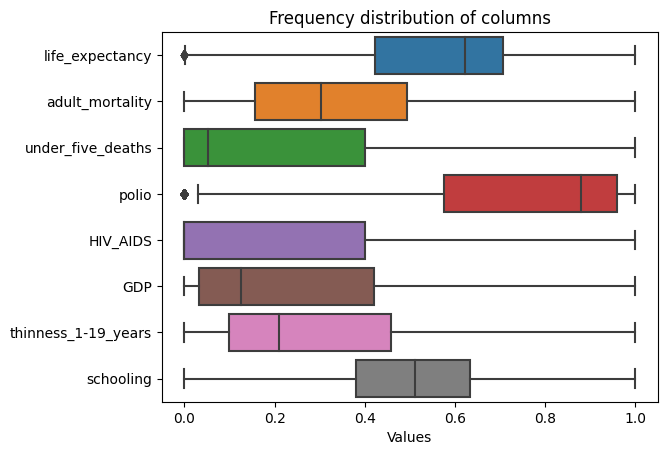

In [51]:
# Create box plot to show frequency distribution summary
sns.boxplot(data=life_exp_df11, orient="h")
# Set title
plt.title('Frequency distribution of columns')
plt.xlabel('Values')
plt.show()

The colored boxes contain the central 50% of data. The vertical line in every box is the median value for that column.
The tails show the values in the lower and upper quartiles.

This box chart confirms the observations made previously, that 'Polio' column has the highest values.

**C. Variance** <a name="variance"></a>

Calculating the variance value for every column,

In [52]:
# Variance values
life_exp_df11.var()

life_expectancy        0.046698
adult_mortality        0.065574
under_five_deaths      0.135649
polio                  0.101555
HIV_AIDS               0.157580
GDP                    0.123732
thinness_1-19_years    0.066922
schooling              0.036887
dtype: float64

**D. Standard deviation** <a name="stdDev"></a>

Calculating the standard deviation value for every column,

In [53]:
# Standard deviation values of normalized columns
life_exp_df11.std()

life_expectancy        0.216097
adult_mortality        0.256074
under_five_deaths      0.368306
polio                  0.318677
HIV_AIDS               0.396963
GDP                    0.351756
thinness_1-19_years    0.258693
schooling              0.192060
dtype: float64

**E. Skewness** <a name="skewness"></a>

Creating a histogram to visuslize distribution of 'Life expectancy' data.

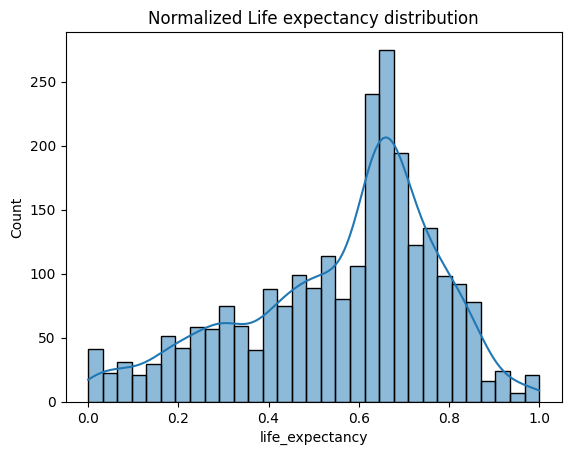

In [54]:
# Create seaborn histogram
sns.histplot(data=life_exp_df11, x="life_expectancy", kde=True, bins=31)

# Set plot title
plt.title('Normalized Life expectancy distribution')
plt.show()

This is an assymetric distibution - a majority of the observations appear to the right of the mean. The left tail is longer than the right. Therefore this is a distribution of a left skew (negative skewness).

The calculation of the skewness value should return a negative value,

In [55]:
# Using pandas skew to calculate skew value
life_exp_df11['life_expectancy'].skew()

-0.6562821104219589

Similarly, we can calculate skewness values for all the key series in the data,

In [56]:
life_exp_df11.skew()

life_expectancy       -0.656282
adult_mortality        0.822299
under_five_deaths      1.199105
polio                 -1.231211
HIV_AIDS               1.187756
GDP                    1.127096
thinness_1-19_years    1.084449
schooling             -0.328555
dtype: float64

It can be seen that the Life expectancy, Polio and Schooling columns have negative skew values. Most of the data in these columns appears to the left of the mean. The rest of the columns have positive skewness.

**F. Kurtosis** <a name="kurtosis"></a>

The kurtosis value informs us of the shape, the peak nature and the tails of the distribution. This value can be used to quantify how much the distribution has deviated from a normal distribution.

Calculating kurtosis values for the columns,

In [57]:
life_exp_df11.kurtosis()

life_expectancy       -0.213837
adult_mortality        0.044566
under_five_deaths     -0.231413
polio                  0.216324
HIV_AIDS              -0.405741
GDP                   -0.254141
thinness_1-19_years    0.475535
schooling             -0.085036
dtype: float64

It can be seen that most of the columns show negative kurtosis. This means that these distributions are platykurtic - they contain fewer extreme values and the data is more spread out.

The 'adult_mortality', 'polio' and 'thinness_1-19_years' columns show positive kurtosis. This means that they are leptokurtic distributions. They have a more peaked shape than a normal distribution and have heavier tails.

## 5. Data visualization <a name="dataViz"></a>

Visualizing the key data series using a seaborn kde plot,

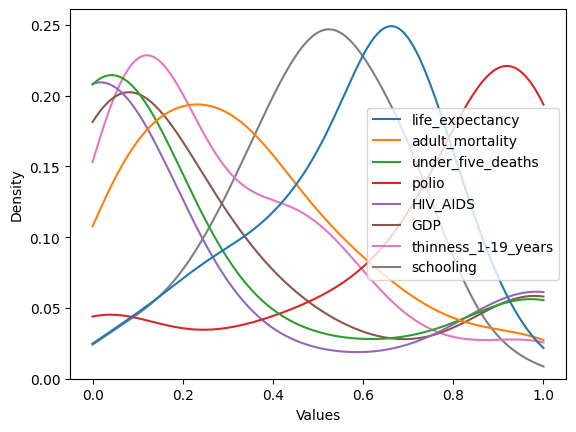

In [58]:
# Create seaborn kde plot
sns.kdeplot(data=life_exp_df11, bw_adjust=2, cut=0)
# Show plot
plt.xlabel('Values')
plt.show()

The kde plot shows the distribution of observations for the key series. It can be seen that 'Adult Mortality', 'under-five deaths', 'HIV/AIDS', 'GDP' and 'thinness  1-19 years' columns are positively skewed while the other variables are negatively skewed.

We can also use a seaborn pair plot to visualize relationships between the key series,

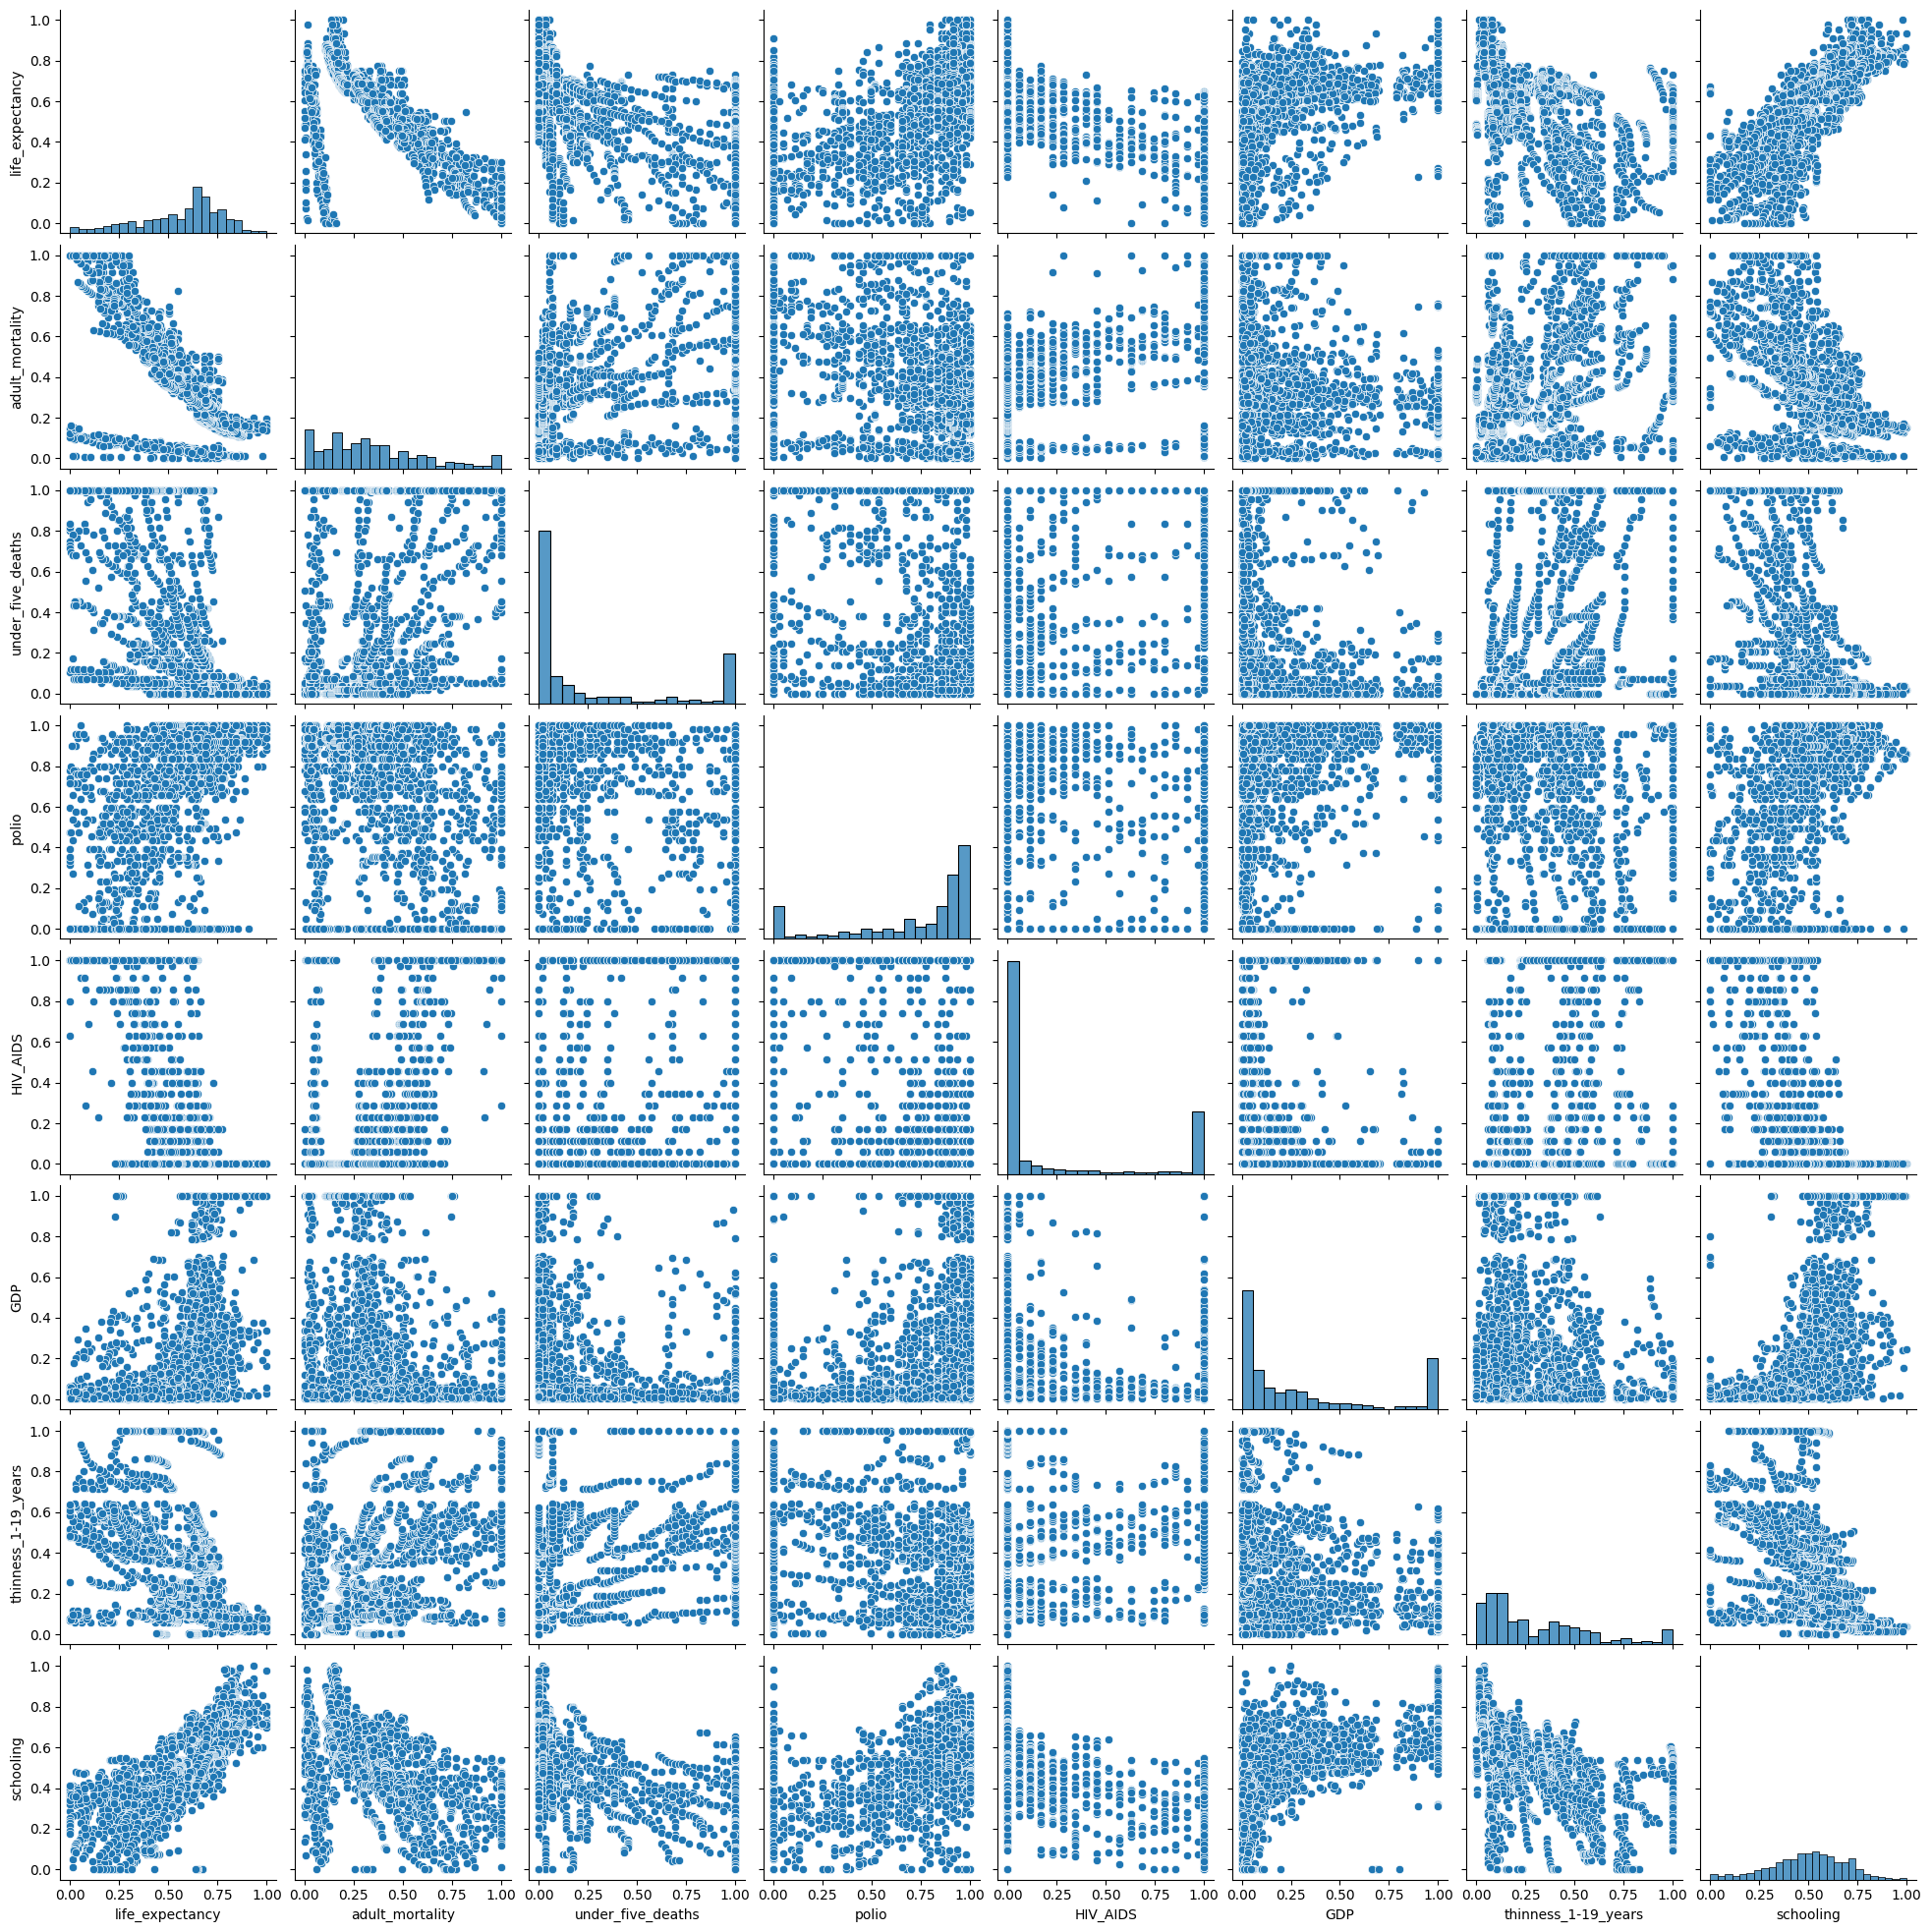

In [59]:
# Create seaborn pair plot
sns.pairplot(life_exp_df11)
plt.show()

The pairplot allows us to spot interesting relationships between variables. For instance, here it can be seen that countries with higher life expectancy also have a higher mean number of years of schooling. And when the HIV/AIDS deaths in children is higher, life expectancy generally becomes lower. Life expectancy also shows some positive collinearity with 'GDP'. Furthermore 'Adult mortality' appears to be negatively correlated with 'Life expectancy.'

#### A. Adult mortality

We can create a density plot to check the distribution of the 'Adult Mortality' data. The author will use the data from before normalization to look for interesting observations.

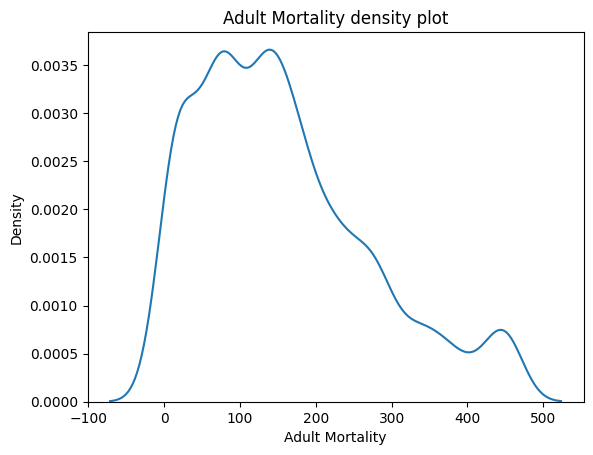

In [60]:
# Density plot to visualize distribution of 'Adult Mortality'
sns.kdeplot(data=life_exp_df8, x='adult_mortality')

# Set plot title and labels
plt.title('Adult Mortality density plot')
plt.xlabel('Adult Mortality')
plt.ylabel('Density')

# Show plot
plt.show()

It can be seen that most of the values appear around 100, and the mean value is roughly 137 (as seen in the summary statistics below).

In [61]:
# Summary statistics from before data was normalized
life_exp_df8.describe()

year  life_expectancy  adult_mortality  infant_deaths  \
count  2480.000000      2480.000000      2480.000000    2480.000000   
mean   2007.500000        69.485585       157.452823      11.569758   
std       4.610702         9.562274       115.233412      16.109723   
min    2000.000000        44.750000         1.000000       0.000000   
25%    2003.750000        63.500000        71.000000       0.000000   
50%    2007.500000        72.300000       137.000000       2.000000   
75%    2011.250000        76.000000       223.000000      18.000000   
max    2015.000000        89.000000       451.000000      45.000000   

           alcohol  percentage_expenditure      measles  under_five_deaths  \
count  2480.000000             2480.000000  2480.000000        2480.000000   
mean      4.577530              379.913559   215.259677          15.158669   
std       4.016579              491.842239   327.343534          21.177598   
min       0.010000                0.000000     0.000000           0.000000   
25%       0.850000               23.654806     0.000000           0.000000   
50%       3.885000              119.901020    15.000000           3.000000   
75%       7.560000              576.437462   334.000000          23.000000   
max      17.625000             1405.611446   835.000000          57.500000   

             polio  total_expenditure   diphtheria     HIV_AIDS           GDP  \
count  2480.000000        2480.000000  2480.000000  2480.000000   2480.000000   
mean     85.290616           5.855887    85.638479     0.542399   4261.053226   
std      15.774498           2.351861    15.088613     0.694685   4981.268865   
min      49.500000           0.370000    52.000000     0.100000      1.681350   
25%      78.000000           4.230000    79.000000     0.100000    464.218481   
50%      93.000000           5.730000    93.000000     0.100000   1784.657015   
75%      97.000000           7.470000    97.000000     0.800000   5943.664517   
max      99.000000          12.330000    99.000000     1.850000  14162.833572   

       thinness_1-19_years  thinness_5-9_years  \
count          2480.000000         2480.000000   
mean              4.693286            4.712157   
std               3.945069            3.961926   
min               0.100000            0.100000   
25%               1.600000            1.600000   
50%               3.300000            3.300000   
75%               7.100000            7.100000   
max              15.350000           15.350000   

       income_composition_of_resources    schooling  
count                      2480.000000  2480.000000  
mean                          0.635723    12.162843  
std                           0.204366     3.255411  
min                           0.056375     3.750000  
25%                           0.494750    10.200000  
50%                           0.685000    12.400000  
75%                           0.787000    14.500000  
max                           0.948000    20.700000

A mean value of 137 means that out of every 1000 people aged 15 years old, 137 of them can be expected to die before reaching the age of 60.

We can create a seaborn jointplot to visualize the relationship between 'Life expectancy' and 'Adult Mortality' by 'Status',It can be seen that 'Adult Mortality' has a strong negative correlation with 'Life expectancy'.

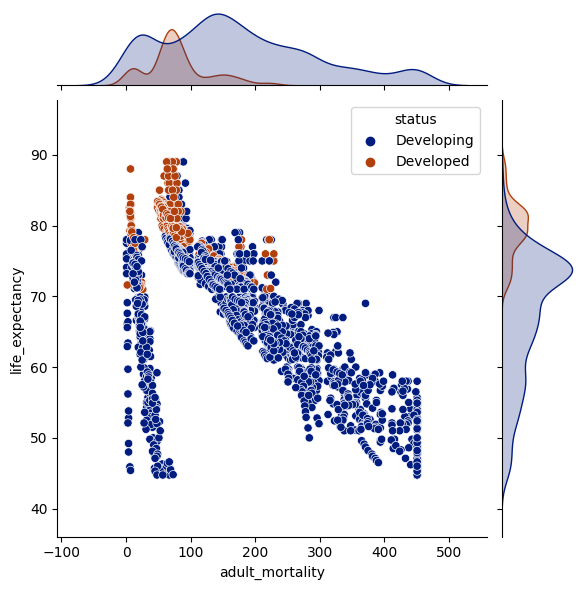

In [62]:
# Create a jointplot
sns.jointplot(data=life_exp_df8, x='adult_mortality', y='life_expectancy', hue='status', palette='dark')

# Display plot
plt.show()

It can easily be observed that developed countries have higher life expectancy values and lower adult mortality values. We can examine this plot again, this time adding a linear regression fit and univariate KDE curves,

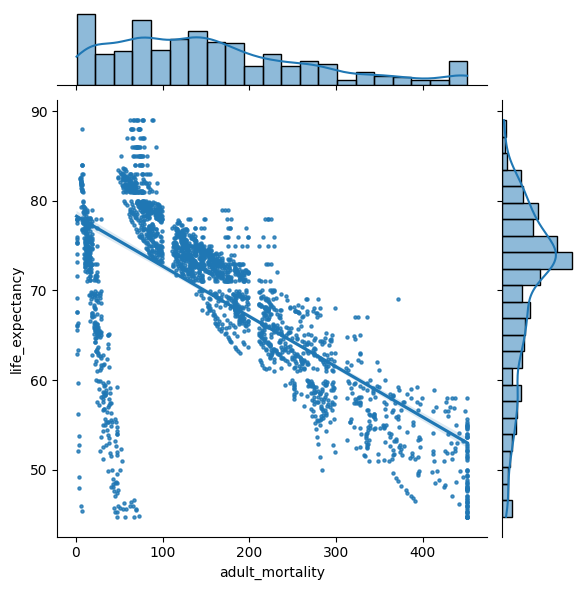

In [63]:
# Create a jointplot with linear regression
sns.jointplot(data=life_exp_df8, x='adult_mortality', y='life_expectancy', kind='reg', scatter_kws={'s': 5})

# Display plot
plt.show()

It can be seen that for the most part,the general pattern here is that life expectancy increases when adult mortality is low. As adult mortality increases, life expectancy decreases.

It can be seen that there is also a subset of data where life expectancy is low even when adult mortality is low. We can check the data from these countries to attempt to find the reason,

In [64]:
# Using 25% quantile values from summary stats table to get rows where both life expectancy and adult mortality are low
life_exp_df8[(life_exp_df8['adult_mortality'] < 71) & (life_exp_df8['life_expectancy'] < 63)].head()

country  year      status  life_expectancy  adult_mortality  \
13    Afghanistan  2002  Developing             56.2              3.0   
62         Angola  2001  Developing             45.7             44.0   
63         Angola  2000  Developing             45.3             48.0   
302        Bhutan  2001  Developing             61.7             29.0   
400  Burkina Faso  2015  Developing             59.9             26.0   

     infant_deaths   alcohol  percentage_expenditure  measles  \
13              45  0.010000               16.887351      835   
62              45  2.580000               30.359936      835   
63              45  1.850000               15.881493      835   
302              1  0.140000                8.574030      756   
400             38  4.241333                0.000000       99   

     under_five_deaths  polio  total_expenditure  diphtheria  HIV_AIDS  \
13                57.5   49.5              7.760        52.0      0.10   
62                57.5   49.5              5.380        52.0      1.85   
63                57.5   49.5              2.790        52.0      1.85   
302                1.0   88.0              5.910        88.0      0.10   
400               57.5   91.0              6.038        91.0      0.60   

            GDP  thinness_1-19_years  thinness_5-9_years  \
13   187.845950                15.35                2.20   
62   526.168743                 1.70                1.70   
63   555.296942                 1.90                1.90   
302   87.938767                15.35               15.35   
400  615.592225                 8.00                7.50   

     income_composition_of_resources  schooling  
13                          0.341000        6.2  
62                          0.391000        5.1  
63                          0.382000        4.6  
302                         0.056375        7.6  
400                         0.399000        7.7

It can be seen that the countries that have both low adult mortality and low life expectancy have a comparatively high number of infant deaths and under-five deaths (see summary stats printed previously). The high numbers of infant deaths and under-five deaths could lower the calculated average life expectancy of the country. 

This would explain how these countries have both low life expectancy and low adult mortality values.

It can also be seen that these countries have notably higher counts of measles cases, higher HIV/AIDS deaths in children, and a lower number of mean years of schooling.

#### B. Schooling

'Schooling' is another key series in our data. We can use a violin plot to visualize the distribution of this data,

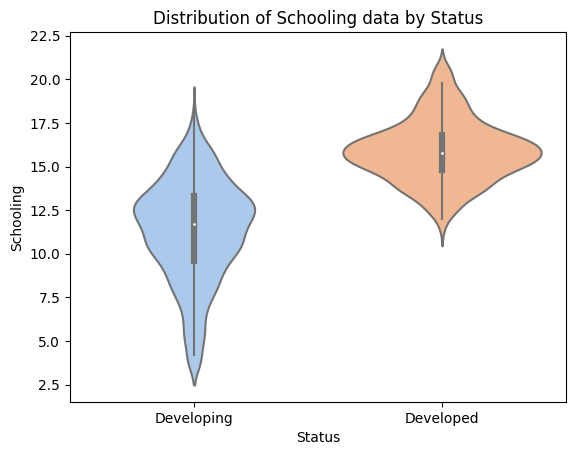

In [65]:
# Violin plot to visualize distribution of 'Schooling' data by the 'Status'
sns.violinplot(data=life_exp_df8, x='status', y='schooling', palette='pastel')

# Set plot title and labels
plt.title('Distribution of Schooling data by Status')
plt.xlabel('Status')
plt.ylabel('Schooling')

# Display the plot
plt.show()

It can be seen that for developed countries, the mean number of years of schooling is higher than for developing countries. The width of the violins suggest that developed countries have a much higher density of persons that complete over 15 years of schooling than developing countries.

The symmetrical shapes of the violins also suggest that the data is distributed around the median in an approximately symmetrical manner.

We can use another seaborn plot to visualize the reliationship between Schooling and life expectancy,

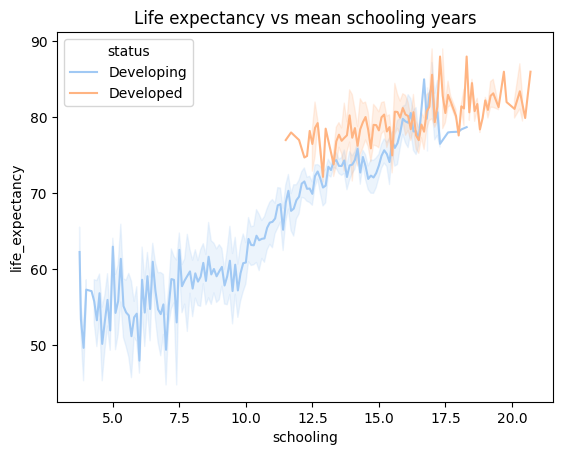

In [66]:
# Create seaborn lineplot
sns.lineplot(data=life_exp_df8, x="schooling", y="life_expectancy", hue="status", palette='pastel')

# Display the plot
plt.title('Life expectancy vs mean schooling years')
plt.show()

As noted in the pair plot observations, this plot confirms that a higher number of mean years of schooling is generally related to higher life expectancy values.

#### C. HIV/AIDS

The seaborn pair plot visualized previously suggested that HIV/AIDS deaths in children is correlated negatively to life expectancy. We can use a strip plot visualization to understand the distribution of this key series data,

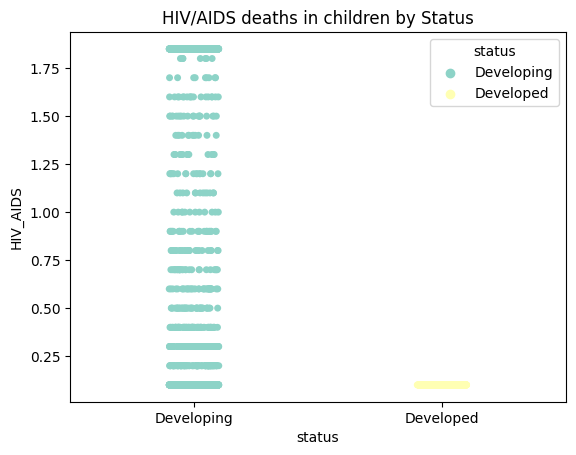

In [67]:
# Create a stripplot to visualize the distribution of HIV/AIDS by country Status
sns.stripplot(data=life_exp_df8, x='status', y='HIV_AIDS', hue='status', palette='Set3')

plt.title('HIV/AIDS deaths in children by Status')
# Show the plot
plt.show()

It can be seen that seen that the vast majority of HIV/AIDS death in children occur in countries with 'Developing' status. We can create another visualization to study the relationship between Life expectancy and HIV/AIDS deaths in children,

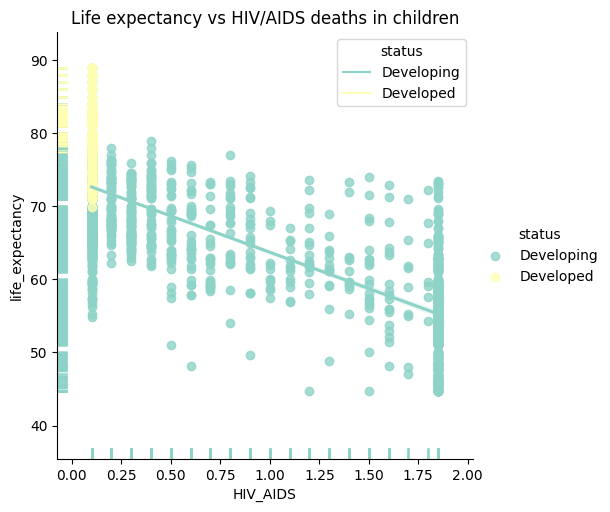

In [68]:
# Create seaborn lmplot
sns.lmplot(data=life_exp_df8, x="HIV_AIDS", y="life_expectancy", hue="status", palette='Set3')
# Create seaborn rug plot
sns.rugplot(data=life_exp_df8, x="HIV_AIDS", y="life_expectancy", hue="status", palette='Set3')

plt.title('Life expectancy vs HIV/AIDS deaths in children')
# Show the plot
plt.show()

It can be seen that the average life expectancy value shows a generally decreasing pattern as the number of HIV/AIDS deaths in children increase. 

#### D. Under-five deaths

Next we can visualize the 'under-five deaths' column to understand its data distribution better,

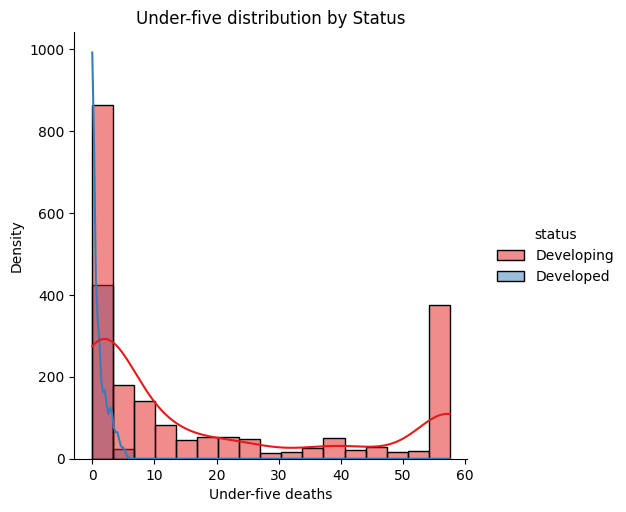

In [69]:
# Displot for visualizing the distribution of under-five deaths by developed/developing status
sns.displot(data=life_exp_df8, x='under_five_deaths', hue='status', kde=True, palette='Set1')

# Plot title and labels
plt.title('Under-five distribution by Status')
plt.xlabel('Under-five deaths')
plt.ylabel('Density')
plt.show()

It can be observed that the number of deaths in children under age 5 is very low in countries with Developed status in comparison with countries having Developing status. Also, the density of under-five deaths becomes notably high as the value increases past 50. This has happened because the author has capped higher values in this column at 57.5 (in section 3.4.)

Printing out the data rows makes this more clear.

In [70]:
# Getting the first rows where under-five death count is greater than 50
life_exp_df8[life_exp_df8['under_five_deaths'] > 50].head()

country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  measles  under_five_deaths  \
0             45     0.01               71.279624      835               57.5   
1             45     0.01               73.523582      492               57.5   
2             45     0.01               73.219243      430               57.5   
3             45     0.01               78.184215      835               57.5   
4             45     0.01                7.097109      835               57.5   

   polio  total_expenditure  diphtheria  HIV_AIDS         GDP  \
0   49.5               8.16        65.0       0.1  584.259210   
1   58.0               8.18        62.0       0.1  612.696514   
2   62.0               8.13        64.0       0.1  631.744976   
3   67.0               8.52        67.0       0.1  669.959000   
4   68.0               7.87        68.0       0.1   63.537231   

   thinness_1-19_years  thinness_5-9_years  income_composition_of_resources  \
0                15.35               15.35                            0.479   
1                15.35               15.35                            0.476   
2                15.35               15.35                            0.470   
3                15.35               15.35                            0.463   
4                15.35               15.35                            0.454   

   schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

We can create a visualization to see the impact of under-five deaths on the average life expectancy value of a country

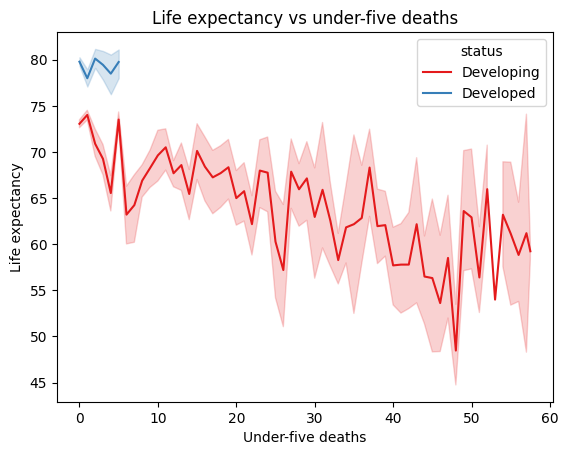

In [71]:
# Create line plot
sns.lineplot(data=life_exp_df8, x='under_five_deaths', y="life_expectancy", hue="status", palette='Set1')

# Plot title and labels
plt.title('Life expectancy vs under-five deaths')
plt.xlabel('Under-five deaths')
plt.ylabel('Life expectancy')
plt.show()

It can be observed that the average life expectancy value generally decreases as the under-five death count increase.

#### E. Polio

The next key series data to visualize is Polio.

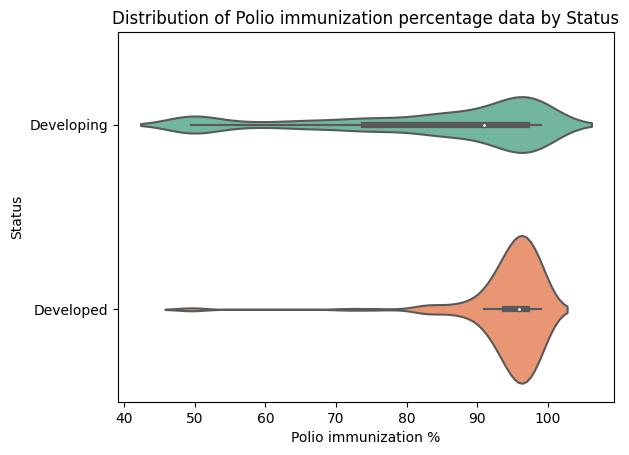

In [72]:
# Violin plot to visualize distribution of 'Polio' data by the 'Status'
sns.violinplot(data=life_exp_df8, x='polio', y='status', palette='Set2')

# Set plot title and labels
plt.title('Distribution of Polio immunization percentage data by Status')
plt.ylabel('Status')
plt.xlabel('Polio immunization %')

# Display the plot
plt.show()

It can be seen by the width of the violins that the density of Polio immunization for children over 1 year old is notably higher for developed countries over developing countries.

Visualizing Polio immunization percentage against life expectancy,

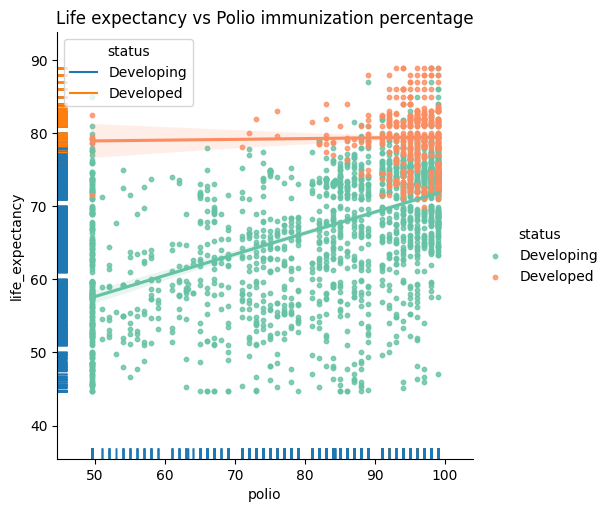

In [73]:
# Create seaborn lmplot
sns.lmplot(data=life_exp_df8, x="polio", y="life_expectancy", hue="status", scatter_kws={'s': 10}, palette='Set2')
# Create seaborn rug plot
sns.rugplot(data=life_exp_df8, x="polio", y="life_expectancy", hue="status")

plt.title('Life expectancy vs Polio immunization percentage')
# Show the plot
plt.show()

This visualization supports the correlation heatmap in section 4.1, which showed these 2 variables to have a moderately strong correlation value of 0.6. 

The percentage of Polio immunization does not have a notable effect on life expectancy for developed countries. However for developing countries, the average life expectancy value appears to generally increase as the Polio immunization percentage increases.

#### F. GDP

The next key series to visualize is GDP,

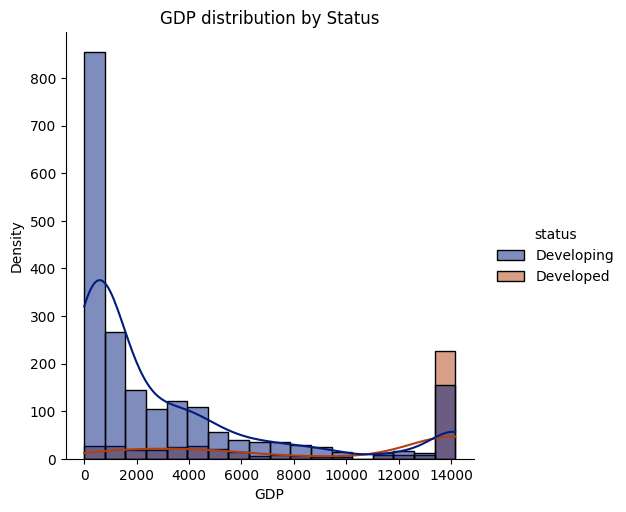

In [74]:
# Displot for visualizing GDP by developed/developing status
sns.displot(data=life_exp_df8, x='GDP', hue='status', kde=True, palette='dark')

# Plot title and labels
plt.title('GDP distribution by Status')
plt.xlabel('GDP')
plt.ylabel('Density')
plt.show()

It can be seen that the density of countries with very low GDP values is much higher the density of countries having a high GDP value.

Visualizing the relationship between GDP and life expectancy,

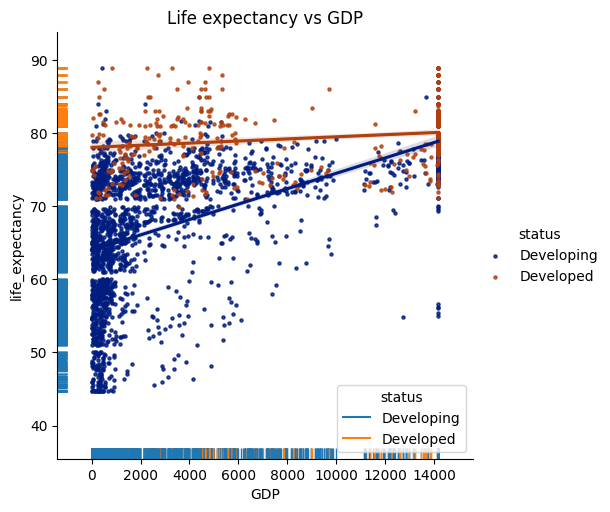

In [75]:
# Create seaborn lmplot
sns.lmplot(data=life_exp_df8, x="GDP", y="life_expectancy", hue="status", scatter_kws={'s': 5}, palette='dark')
# Create seaborn rug plot
sns.rugplot(data=life_exp_df8, x="GDP", y="life_expectancy", hue="status")

plt.title('Life expectancy vs GDP')
# Show the plot
plt.show()

It can be observed that life expectancy appears to increase as a country's GDP increases.

#### G. thinness 1-19 years

This column refers to the percentage thinness of children aged between 1 and 19 years.

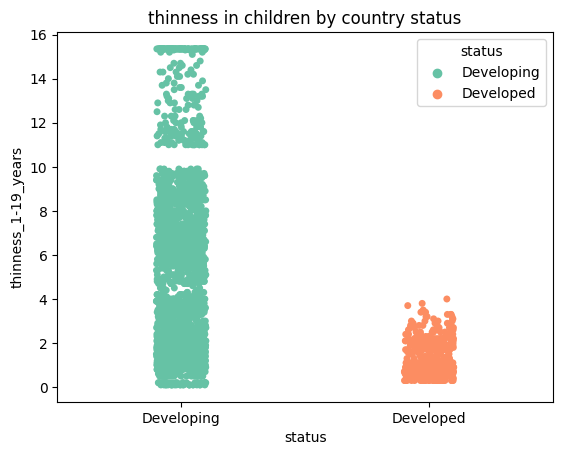

In [76]:
# Create a stripplot to visualize the distribution of HIV/AIDS by country Status
sns.stripplot(data=life_exp_df8, x='status', y= 'thinness_1-19_years', hue='status', palette='Set2')

plt.title('thinness in children by country status')
# Show the plot
plt.show()

It can be seen that Developing countries have a higher percentage thinness in children than Developed countries.

Visualizing the relationship between child thinness percentage and life expectancy.

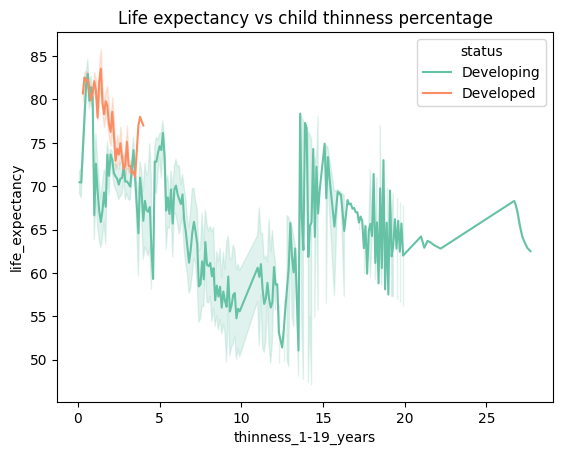

In [77]:
# Create seaborn lineplot
sns.lineplot(data=life_exp_df7, x='thinness_1-19_years', y="life_expectancy", hue="status", palette='Set2')

# Display the plot
plt.title('Life expectancy vs child thinness percentage')
plt.show()

Life expectancy appears to decrease with child thinness percentage, but only up to a point. When the child thinness percentage value approaches 15, the average life expectancy increases. Past this point, the life expectancy appears to settle in a value range from about 60 to 75.

**H. An overall look**

Now that the key data series have been visualized, we can look at how life expectancy has increased over the years.

Creating a bar plot visualization to show how the average life expectancy has increased over the years 2000 to 2015,

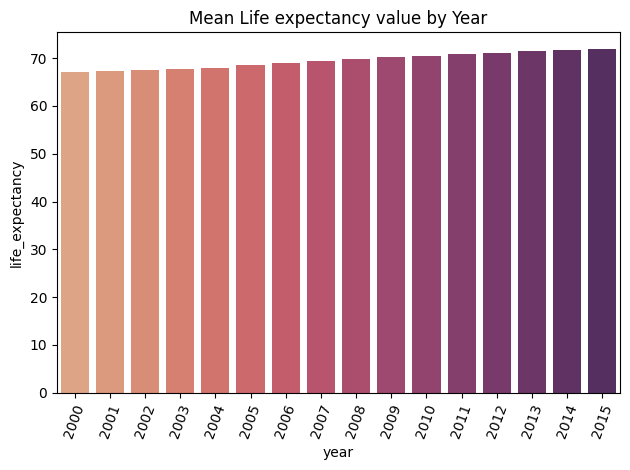

In [78]:
# Calculate the mean life expectancy value by Year
mean_life_exp = life_exp_df8.groupby('year')['life_expectancy'].mean().reset_index()

# Bar plot
sns.barplot(data=mean_life_exp, x='year', y='life_expectancy', palette='flare')
plt.title('Mean Life expectancy value by Year')
plt.xticks(rotation=70)
plt.tight_layout()

plt.show()

Below is an interactive visualization that shows the distribution of life expectancy data,

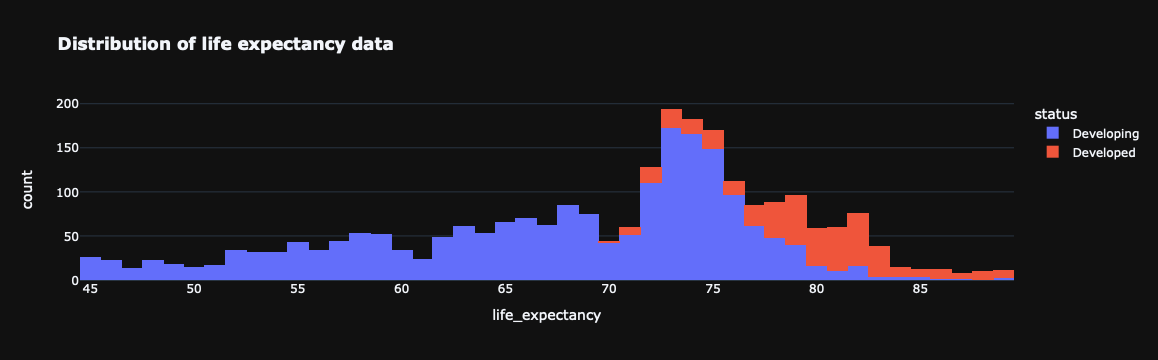

In [79]:
# plotly interactive histogram
fig = px.histogram(life_exp_df8, 
                   x='life_expectancy', 
                   color='status', 
                   template='plotly_dark', 
                   title='<b>Distribution of life expectancy data')
fig.show()

It can be seen that the most common life span count is around the mid 70s, and that the average life expectancy of Developed countries appears to be higher than that of Developing countries.

We can also created an animated visualization of the life expectancy of countries over the years 2000-2015,

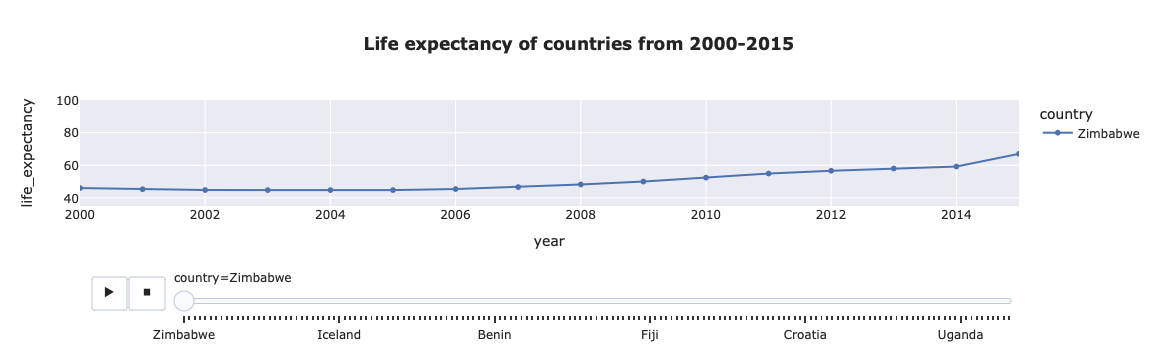

In [80]:
# plotly line plot
fig = px.line(life_exp_df8.sort_values(by='year'),
              x='year', 
              y='life_expectancy', 
              range_y=[35, 100],
              range_x=[2000, 2015],
              animation_frame='country', 
              animation_group='year', 
              color='country', 
              markers=True, 
              template='seaborn', 
              title='<b>Life expectancy of countries from 2000-2015')
fig.show()

## 6. Baseline model <a name="baseline"></a>

A baseline regression model serves as a comparison for other models. We can use sklearn's DummyRegressor which will predict the mean value of the training set. The result score will be the r2 score (co-efficent of determination).

In [81]:
# Initialize dummy regressor
dummy_reg_model = DummyRegressor()
dummy_reg_model

DummyRegressor()

Arrange data into features matrix and target vector

In [82]:
# Dropping life expectancy column as it is the target variable
X_life_exp = life_exp_df11.drop('life_expectancy', axis=1)
print(X_life_exp.shape) # checking shape

(2480, 7)


In [83]:
# Creating target vector
y_life_exp = life_exp_df11['life_expectancy']
print(y_life_exp.shape) # checking shape

(2480,)


Setting up the training and test data,

In [84]:
# Leaving a third of the data out to test the model
X_train, X_test, y_train, y_test = train_test_split(X_life_exp, y_life_exp, test_size=1/3, random_state=42)

Fitting the baseline model to the data,

In [85]:
# Use the training datasets to fit the model
dummy_reg_model.fit(X_train, y_train)

# Print r2 score
dummy_reg_score = dummy_reg_model.score(X_test, y_test)
print(f"Baseline model score (r2): {dummy_reg_score:.5f}")

Baseline model score (r2): -0.00005


It can be seen that this model's performance is very poor.

## 7. Linear regression model<a name="mlModel"></a>

### 7.1. Building the model <a name="modelBuilding"></a>

**Feature selection**

Linear regression models assume that the prediction is a linear combination of the inputs.

The model works best when using features that are not strongly collinear with each other, but show correlation with the target variable. So we can use the dataframe from section 3.7. that uses the key series and contains no collinear features

Features: 'Adult Mortality', 'under-five deaths', 'Polio', 'HIV/AIDS', 'GDP', 'thinness 1-19 years' and 'Schooling'

In [86]:
# Printing first 5 rows of the processed data to see the features and label
life_exp_df11.head()

life_expectancy  adult_mortality  under_five_deaths     polio  HIV_AIDS  \
0         0.457627         0.582222                1.0  0.000000       0.0   
1         0.342373         0.600000                1.0  0.171717       0.0   
2         0.342373         0.593333                1.0  0.252525       0.0   
3         0.333333         0.602222                1.0  0.353535       0.0   
4         0.326554         0.608889                1.0  0.373737       0.0   

        GDP  thinness_1-19_years  schooling  
0  0.041139                  1.0   0.374631  
1  0.043147                  1.0   0.368732  
2  0.044492                  1.0   0.362832  
3  0.047191                  1.0   0.356932  
4  0.004368                  1.0   0.339233

**Building linear regression model**

In [87]:
linear_reg_model = LinearRegression()

# Fitting the model to the data
# Use the training datasets to fit the model
linear_reg_model.fit(X_train, y_train)

LinearRegression()

**Apply model to unseen data**

Calculating r-squared (the coefficient of determination) to determine how well the regression performs on the unseen test data.

In [88]:
# Calculating r-squared
lin_reg_r2 = linear_reg_model.score(X_test, y_test)

print(f"Linear reg score (r2): {lin_reg_r2:.5f}")

Linear reg score (r2): 0.83730


The result is roughly about 84%, which tells us that this model performs reasonably well on data it has not seen before. The result means that roughly 84% of the variability in 'Life expectancy' can be connected with a linear relationship with the model features.

It can be seen that the model fits the data and further preprocessing is not required.

### 7.2. Model validation <a name="validation"></a>

#### 7.2.1. Metrics assessment <a name="metricsAssessment"></a>

**A. Mean squared error (MSE)**

The first metric we can check is the mean squared error,

In [89]:
# Predicting y values for unseen X data
y_pred = linear_reg_model.predict(X_test)

# Calculate mean squared error value
lin_reg_mse = mean_squared_error(y_test, y_pred)
print(f"Linear reg MSE: {lin_reg_mse:.5f}")

Linear reg MSE: 0.00752


The model has a low mean squared error value, which validates the linear regression model. This low error value indicates that the predictions made by the model appear to have good precision and that the model appears to capture the relationships in the data satisfactorily.

**B. Mean absolute error (MAE)**

Another metric to check is the mean absolute error,

In [90]:
# Calculate mean absolute error value
lin_reg_mae = mean_absolute_error(y_test, y_pred)
print(f"Linear reg MAE: {lin_reg_mae:.5f}")

Linear reg MAE: 0.06294


It can be seen that the mean absolute error is low, which means that values predicted by the model are close to the true values in the dataset. Therefore, this metric has also validated the model.

#### 7.2.2. Cross validation <a name="crossValidation"></a>

A cross validation can be used to validate the results of the model. We will use random-fold validation. This will shuffle the data repeatedly and do random train/splits on the data.

In [91]:
# From - O'Reilly Essential Math for Data Science by Thomas Nield pg. 190

# Using 10 splits will give us 10 scores
kfold = ShuffleSplit(n_splits=10, test_size=.33, random_state=7)
result_cross_val = cross_val_score(linear_reg_model, X_life_exp, y_life_exp, cv=kfold)

print(result_cross_val)

[0.85089586 0.8374345  0.84021651 0.85676653 0.84436314 0.84443998
 0.81353528 0.85274491 0.83345756 0.83952415]


The result array shows the performance of the author's linear regression model on every randomized train-test split. 

Looking at this array it can be seen that there is less variance among the values. The model has achieved almost the same performance across different splits of the data.

This means that the model is able to generalize well to different subsets of the data.

We can calculate the mean result to check it against our original model score.

In [92]:
# Mean performance
result_cross_val.mean()

0.8413378436285257

It can be seen that this result is extremely close to the model score (0.83730), which validates the performance of our linear regression model.

#### 7.2.3. Residual analysis <a name="residualAnalysis"></a>

A residual analysis can be performed to study the difference between the predicted and true values for the linear regression model.

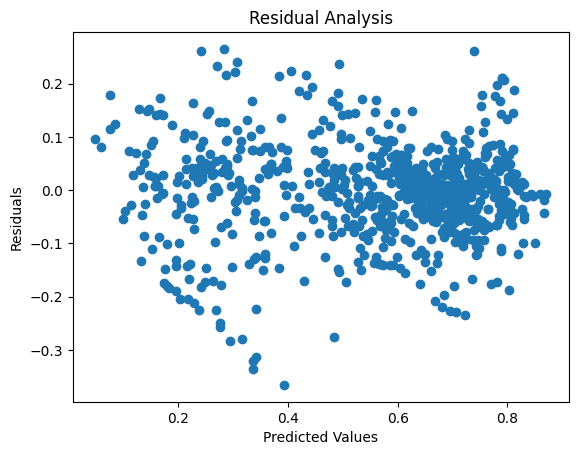

In [93]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()

We can also use Yellowbrick to create another residuals plot to visualize homoscedasticity and outliers.

/Users/tashvit/Documents/GitHub/ds/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



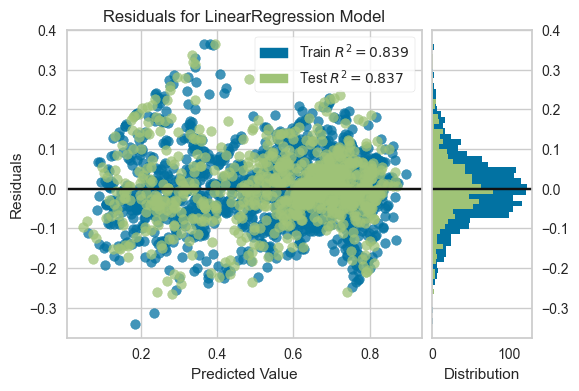

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [94]:
from yellowbrick.regressor import ResidualsPlot

fig, ax = plt.subplots(figsize=(6, 4))
res_plot_viz = ResidualsPlot(linear_reg_model)
res_plot_viz.fit(X_train, y_train)
res_plot_viz.score(X_test, y_test)
res_plot_viz.poof()

We can test for heteroscedasticity using the Breusch-Pagan test, to find out if the predictions are biased.

In [95]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Add a constant column for intercept
X = sm.add_constant(X_life_exp)
y = y_life_exp

model = sm.OLS(y, X)
results = model.fit()

# Obtain the residuals
residuals = results.resid

# Perform the Breusch-Pagan test
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X)

# Print the results
print("Breusch-Pagan test results:")
print(f"LM statistic: {lm:.5f}")
print(f"LM test p-value: {lm_p_value:.5f}")
print(f"F-statistic: {fvalue:.5f}")
print(f"F-test p-value: {f_p_value:.5f}")

Breusch-Pagan test results:
LM statistic: 279.03265
LM test p-value: 0.00000
F-statistic: 44.77049
F-test p-value: 0.00000


Since both the LM test p-value and the F-test p-value are very small (close to 0), we reject the null hypothesis of homoscedasticity. The results suggest that the variance of the errors in our regression model is not constant across different levels of the independent variables, and so we can conclude that the predctions are biased. We can use alternative models to combat the problem of heteroscedasticity.

We can look at the slope and the intercept of the linear fit to the data,

In [96]:
print(linear_reg_model.coef_) # slope
print(linear_reg_model.intercept_) # intercept

[-0.17647657 -0.04981719  0.05366492 -0.20841926  0.05360049 -0.06999398
  0.2986986 ]
0.5054556999070268


It can be seen that some of the coefficients are positive and some are negative.

This means that the model has considered the overall relationship between the features and the label. It has taken into account that some variables such as 'Schooling' and 'GDP' are positively correlated to 'Life expectancy' while other variables such as 'Adult mortality' and 'HIV/AIDS' are negatively correlated.

The larger the absolute value of the coefficient, the more impact it has on the model. We can visualize the coefficients using the YellowBrick library to understand which features contribute most to the linear regression.

/Users/tashvit/Documents/GitHub/ds/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



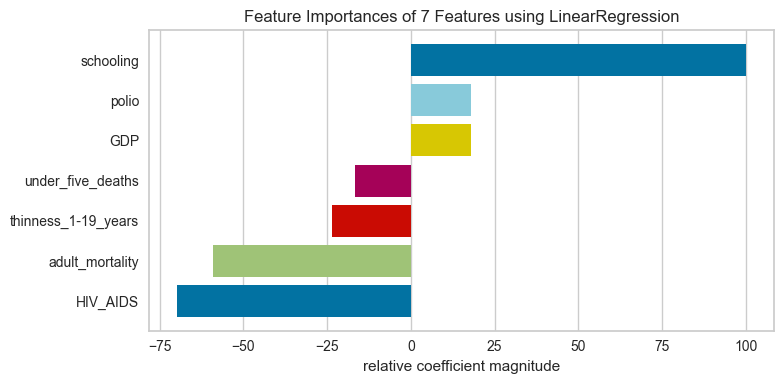

<AxesSubplot: title={'center': 'Feature Importances of 7 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [97]:
from yellowbrick.features import FeatureImportances

fig, ax = plt.subplots(figsize=(8, 4))
feature_importance_vis = FeatureImportances(linear_reg_model)
feature_importance_vis.fit(X_life_exp, y_life_exp)
feature_importance_vis.poof()

The visualization indicates that life expectancy of a country increases as the average number of schooling years increases, and that increasing HIV/AIDS rates will negatively impact the life expectancy.

### 7.3. Feature engineering <a name="featureEngineering"></a>

#### 7.3.1. Polynomial features <a name="polynomialFeatures"></a>

We can add more flexibility to the model by using polynomial features, which may result in a better fit. 

The author will use the grid search module from Scikit-Learn to attempt to find the best polynomial model.

In [98]:
# Polynomial Regression code from O'REILLY Python Data Science Handbook by Jake VanderPlas

def PolynomialRegression(degree=2, **kwargs):
    """
    Create a pipeline for polynomial regression
    This is a class like function that constructs an object (This is why UpperCamelCase is used)
    :param degree: degree of polynomial features
    :param kwargs: options for linear regression
    :return: pipeline object
    """
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(1, 8),
              'linearregression__fit_intercept': [True, False]}

grid_search = GridSearchCV(PolynomialRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

Best Parameters:  {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 3}


These parameters will be used to fit the data to the new polynomial model.

In [99]:
# Using the best model
polynomial_model = grid_search.best_estimator_
polynomial_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

Test the model using unseen data,

In [100]:
# Calculating r-squared
poly_score_r2 = polynomial_model.score(X_test, y_test)
print(f"Polynomial model score (r2): {poly_score_r2:.5f}")

Polynomial model score (r2): 0.91374


**Evaluation**

We can see that the new model score is about 91%, which is a notable improvement from the previous model score of 84%.

Therefore this polynomial model is an improvement over the initial linear regression model.

#### 7.3.2. Categorical encoding <a name="categoricalEncoding"></a>

When preprocessing data for the machine learning model, the author dropped categorical data that may prove useful to improve the model's performance.

We can encode the data from the 'Status' column which contains categorical data about a country's 'Developed' or 'Developing' status.

This would result in an additional column that can perhaps be useful in enhancing the model.

In [101]:
# Create a copy of the last DataFrame that contains 'Status' data
life_exp_df12 = life_exp_df9.copy()

# Adapted from https://stackoverflow.com/a/70537483
# Add a new column that encodes Status column data ()'Developed' to 1 and 'Developing' to 0)
life_exp_df12['status_numeric'] = life_exp_df9.apply(
    lambda row: 1.0 if 'Developed' == row['status'] else 0.0,
    axis=1
)

# Create a copy of the DataFrame used for the machine learning model
temp_df = life_exp_df11.copy()

# Add a new column to the temporary DataFrame to hold the encoded 'Status' data
temp_df['status_numeric'] = life_exp_df12['status_numeric']

# Overwrite the life_exp_df12 DataFrame with the data from the temporary DataFrame
life_exp_df12 = temp_df

# Printing the first 5 rows
life_exp_df12.head()

life_expectancy  adult_mortality  under_five_deaths     polio  HIV_AIDS  \
0         0.457627         0.582222                1.0  0.000000       0.0   
1         0.342373         0.600000                1.0  0.171717       0.0   
2         0.342373         0.593333                1.0  0.252525       0.0   
3         0.333333         0.602222                1.0  0.353535       0.0   
4         0.326554         0.608889                1.0  0.373737       0.0   

        GDP  thinness_1-19_years  schooling  status_numeric  
0  0.041139                  1.0   0.374631             0.0  
1  0.043147                  1.0   0.368732             0.0  
2  0.044492                  1.0   0.362832             0.0  
3  0.047191                  1.0   0.356932             0.0  
4  0.004368                  1.0   0.339233             0.0

We can check if adding this column improves the initial linear regression model's score.

Arranging the new features matrix and target variable,

In [102]:
X_life_exp1 = life_exp_df12.drop('life_expectancy', axis=1) # features matrix
y_life_exp1 = life_exp_df12['life_expectancy'] # target variable

# Leaving a third of the data out to test the model
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_life_exp1, y_life_exp1, test_size=1/3, random_state=42)

# Use the training datasets to fit the initial linear regression model
linear_reg_model.fit(X_train1, y_train1)

# Calculating model score
lin_reg_cat_score = linear_reg_model.score(X_test1, y_test1)
lin_reg_cat_score
print(f"Linear regression with categorical encoding score (r2): {lin_reg_cat_score:.5f}")

Linear regression with categorical encoding score (r2): 0.83717


This result is almost identical to the result obtained by using the linear regression model without categorical encoding. So the use of categorical encoding has not made a difference to the model's performance.

**Evaluation**

It appears that the new column containing the 'Developed' or 'Developing' status of a country (encoded) does not add any value to the model.

This could be because the model can already infer this information from the other features. The data visualizations created in section 5 of this report showed how Developed countries had notably higher GDP values, lower HIV/AIDS deaths in children and a higher mean number of schooling years than Developing countries.

## 8. Regularized regression models <a name="rrModels"></a>

### 8.1. Ridge regression with cross validation <a name="ridgeRegression"></a>

In [103]:
from sklearn.linear_model import RidgeCV

# Initialize RidgeCV with a range of alpha values
alphas = [0.1, 1.0, 10.0, 0.04, 0.01]
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Get the best alpha value
best_alpha = ridge_cv.alpha_
print(f"Best alpha: {best_alpha:.2f}")

# Apply model on unseen data
ridge_cv_score = ridge_cv.score(X_test, y_test)
print(f"Ridge CV score (r2): {ridge_cv_score:.5f}")

# Model evaluation
# Predict on the test set
y_pred2 = ridge_cv.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred2)
# Calculate mean absolute error value
mae_ridge = mean_absolute_error(y_test, y_pred2)

print(f"Ridge CV Mean Squared Error: {mse_ridge:.5f}")
print(f"Ridge CV Mean Absolute Error: {mae_ridge:.5f}")

Best alpha: 0.10
Ridge CV score (r2): 0.83734
Ridge CV Mean Squared Error: 0.00752
Ridge CV Mean Absolute Error: 0.06294


### 8.2. Lasso regression with cross validation <a name="lassoRegression"></a>

In [104]:
from sklearn.linear_model import LassoCV

# Initialize LassoCV with a range of alpha values
lasso_cv_model = LassoCV(alphas=[0.1, 0.5, 1.0, 0.06, 0.01, 0.009], cv=5) # 5-fold cross-validation

# Fit the model to the training data
lasso_cv_model.fit(X_train, y_train)

# Get the best alpha value
best_alpha = lasso_cv_model.alpha_
print(f"Best alpha: {best_alpha:.2f}")

# Apply model on unseen data
lasso_cv_score = lasso_cv_model.score(X_test, y_test)
print(f"Lasso CV score (r2): {lasso_cv_score:.5f}")

# Model evaluation
# Predict on the test set
y_pred3 = lasso_cv_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred3)
# Calculate mean absolute error value
mae_lasso = mean_absolute_error(y_test, y_pred3)

print(f"Lasso CV Mean Squared Error: {mse_lasso:.5f}")
print(f"Lasso CV Mean Absolute Error: {mae_lasso:.5f}")

Best alpha: 0.01
Lasso CV score (r2): 0.79583
Lasso CV Mean Squared Error: 0.00944
Lasso CV Mean Absolute Error: 0.07252


### 8.3. SGD regressor <a name="sgdRegressor"></a>

In [105]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

pipeline = Pipeline([
    ('sgd', SGDRegressor())
])

# Define parameter grid
param_grid = {
    'sgd__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'sgd__alpha': [0.0001, 0.001, 0.01, 0.007, 0.008],
    'sgd__max_iter': [8000, 10000]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best params: {best_params}")
sgd_reg_model = grid_search.best_estimator_

# Evaluate best model on test set
sgd_reg_score = sgd_reg_model.score(X_test, y_test)
print(f"SGD Reg score (r2): {sgd_reg_score:.5f}")

# Model evaluation
# Predict on the test set
y_pred4 = sgd_reg_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_sgd_reg = mean_squared_error(y_test, y_pred4)
# Calculate mean absolute error value
mae_sgd_reg = mean_absolute_error(y_test, y_pred4)

print(f"SGD Reg Mean Squared Error: {mse_sgd_reg:.5f}")
print(f"SGD Reg Mean Absolute Error: {mae_sgd_reg:.5f}")

Best params: {'sgd__alpha': 0.001, 'sgd__learning_rate': 'adaptive', 'sgd__max_iter': 10000}
SGD Reg score (r2): 0.83764
SGD Reg Mean Squared Error: 0.00750
SGD Reg Mean Absolute Error: 0.06295


## 9. Support vector machine<a name="svr"></a>

Using support vector regression,

In [106]:
from sklearn.svm import SVR

# Initialize SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Apply model on unseen data
svr_score = svr_model.score(X_test, y_test)
print(f"SVR score (r2): {svr_score:.5f}")

# Model evaluation
# Predict on the test set
y_pred5 = svr_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_sv_reg = mean_squared_error(y_test, y_pred5)
# Calculate mean absolute error value
mae_sv_reg = mean_absolute_error(y_test, y_pred5)

print(f"SVR Mean Squared Error: {mse_sv_reg:.5f}")
print(f"SVR Mean Absolute Error: {mae_sv_reg:.5f}")

SVR score (r2): 0.89302
SVR Mean Squared Error: 0.00494
SVR Mean Absolute Error: 0.05622


## 10. K-Nearest Neighbor <a name="knn"></a>

In [107]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNR model
knr_model = KNeighborsRegressor()

# Fit the model to the training data
knr_model.fit(X_train, y_train)

# Apply model on unseen data
knr_score = knr_model.score(X_test, y_test)
print(f"KNR score (r2): {knr_score:.5f}")

# Model evaluation
# Predict on the test set
y_pred6 = knr_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_knr = mean_squared_error(y_test, y_pred6)
# Calculate mean absolute error value
mae_knr = mean_absolute_error(y_test, y_pred6)

print(f"KNR Mean Squared Error: {mse_knr:.5f}")
print(f"KNR Mean Absolute Error: {mae_knr:.5f}")

KNR score (r2): 0.91188
KNR Mean Squared Error: 0.00407
KNR Mean Absolute Error: 0.04445


## 11. Tree based models and ensembles <a name="treeModels"></a>

### 11.1. Decision tree <a name="decisionTree"></a>

In [108]:
from sklearn.tree import DecisionTreeRegressor

# Initialize decision tree regressor model
dt_reg_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_reg_model.fit(X_train, y_train)

# Apply model on unseen data
dt_reg_score = dt_reg_model.score(X_test, y_test)
print(f"Decision Tree reg score (r2): {dt_reg_score:.5f}")

# Model evaluation
# Predict on the test set
y_pred7 = dt_reg_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_dt_reg = mean_squared_error(y_test, y_pred7)
# Calculate mean absolute error value
mae_dt_reg = mean_absolute_error(y_test, y_pred7)

print(f"Decision Tree Mean Squared Error: {mse_dt_reg:.5f}")
print(f"Decision Tree Mean Absolute Error: {mae_dt_reg:.5f}")

Decision Tree reg score (r2): 0.92041
Decision Tree Mean Squared Error: 0.00368
Decision Tree Mean Absolute Error: 0.03762


Visualize the top of decision tree to see the most important features,

In [109]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_reg_model, max_depth=2, out_file=None, 
                           feature_names=X_life_exp.columns, 
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)

# Save the graph as a PNG image
graph.render("decision_tree_regression", format="png")

'decision_tree_regression.png'

![Cat](decision_tree_regression.png)

We can create a scatter plot at each of the nodes of the tree using the dtreeviz package.

/Users/tashvit/Documents/GitHub/ds/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


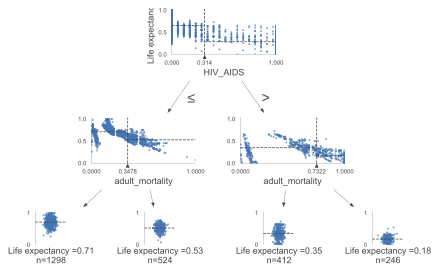

In [110]:
import dtreeviz

dtr = DecisionTreeRegressor(random_state=42, max_depth=2)
dtr.fit(X_train, y_train)

viz_model = dtreeviz.model(dtr, X_life_exp, y_life_exp, target_name='Life expectancy ', feature_names=X_life_exp.columns)

viz_model.view()

### 11.2. Random forest <a name="randomForest"></a>

In [111]:
from sklearn.ensemble import RandomForestRegressor

# Initialize random forest regressor model
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_reg_model.fit(X_train, y_train)

# Apply model on unseen data
rf_reg_score = rf_reg_model.score(X_test, y_test)
print(f"Random forest reg score (r2): {rf_reg_score:.5f}")

# Model evaluation
# Predict on the test set
y_pred8 = rf_reg_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_rf_reg = mean_squared_error(y_test, y_pred8)
# Calculate mean absolute error value
mae_rf_reg = mean_absolute_error(y_test, y_pred8)

print(f"Random Forest Mean Squared Error: {mse_rf_reg:.5f}")
print(f"Random Forest Mean Absolute Error: {mae_rf_reg:.5f}")

Random forest reg score (r2): 0.95897
Random Forest Mean Squared Error: 0.00190
Random Forest Mean Absolute Error: 0.02824


We can create a histogram of residuals to check their normality,

<AxesSubplot: title={'center': 'Residual Histogram'}, ylabel='Frequency'>

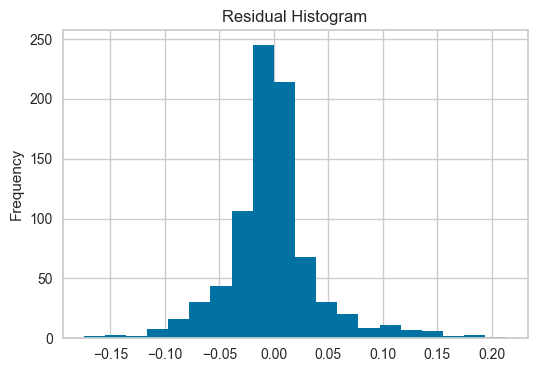

In [112]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - y_pred8
pd.Series(resids, name="resoduals").plot.hist(bins=20, ax=ax, title="Residual Histogram")

We can also create a probability plot of residuals,

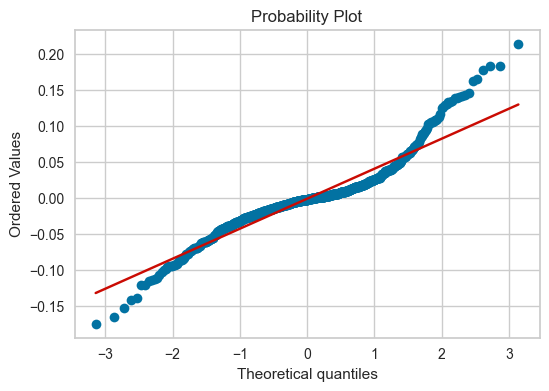

In [113]:
from scipy import stats
fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(resids, plot=ax)
plt.show()

It can be seen that the samples plotted against the quantiles fail to completely line up, and so the residuals are not normal.

We can further use the Kolmogorov-Smirnov test to measure whether the distribution is normal.

In [114]:
stats.kstest(resids, cdf="norm")

KstestResult(statistic=0.44600765985471347, pvalue=1.6522701971979378e-150)

It can be seen that the p-value is significant (<0.05), and the residuals are not normal.

We can also use a prediction error plot to visualize the real targets against the predicted values.

/Users/tashvit/Documents/GitHub/ds/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


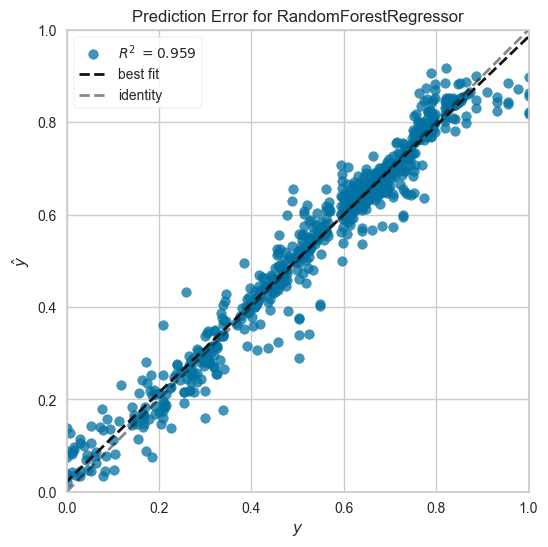

<AxesSubplot: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [115]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(6, 6))
pred_err_viz = PredictionError(rf_reg_model)
pred_err_viz.fit(X_train, y_train)
pred_err_viz.score(X_test, y_test)
pred_err_viz.poof()

Looking at the plot, it can be seen that the model's performance could be somewhat improved. For a perfect model, the predicted values would match the actual values for every observation in the data, and there would be no outlier points.

### 11.3. Gradient boosting machine <a name="gbm"></a>

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GBM model
gb_reg_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
gb_reg_model.fit(X_train, y_train)

# Apply model on unseen data
gb_reg_score = gb_reg_model.score(X_test, y_test)
print(f"GBM reg score (r2): {gb_reg_score:.5f}")

# Model evaluation
# Predict on the test set
y_pred9 = gb_reg_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_gb_reg = mean_squared_error(y_test, y_pred9)
# Calculate mean absolute error value
mae_gb_reg = mean_absolute_error(y_test, y_pred9)

print(f"GBM Mean Squared Error: {mse_gb_reg:.5f}")
print(f"GBM Mean Absolute Error: {mae_gb_reg:.5f}")

GBM reg score (r2): 0.93279
GBM Mean Squared Error: 0.00311
GBM Mean Absolute Error: 0.03903


### 11.4. XGBoost regression <a name="xgboost"></a>

In [117]:
import xgboost as xgb

# Initialize XGBR
xgbr_model = xgb.XGBRegressor(random_state=42)

# Fit the model to the training data
xgbr_model.fit(X_train, y_train)

# Apply model on unseen data
xgb_reg_score = xgbr_model.score(X_test, y_test)
print(f"XGB reg score (r2): {xgb_reg_score:.5f}")

# Model evaluation
# Predict on the test set
y_pred10 = xgbr_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_xgb_reg = mean_squared_error(y_test, y_pred10)
# Calculate mean absolute error value
mae_xgb_reg = mean_absolute_error(y_test, y_pred10)

print(f"XGB Mean Squared Error: {mse_xgb_reg:.5f}")
print(f"XGB Mean Absolute Error: {mae_xgb_reg:.5f}")

XGB reg score (r2): 0.95556
XGB Mean Squared Error: 0.00205
XGB Mean Absolute Error: 0.03028


Plotting feature importance (F score),

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

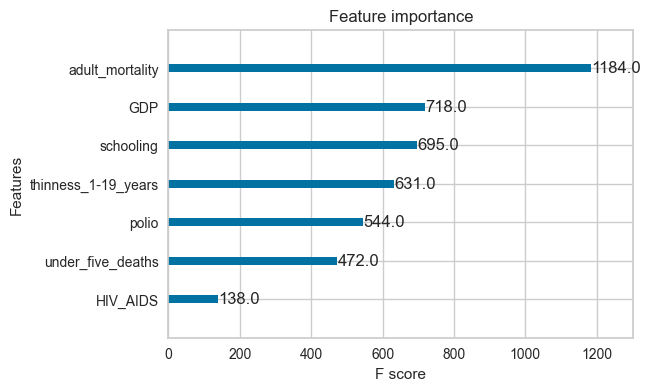

In [118]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgbr_model, ax=ax)

Using YellowBrick to plot feature importance shows the percent importance of the features.

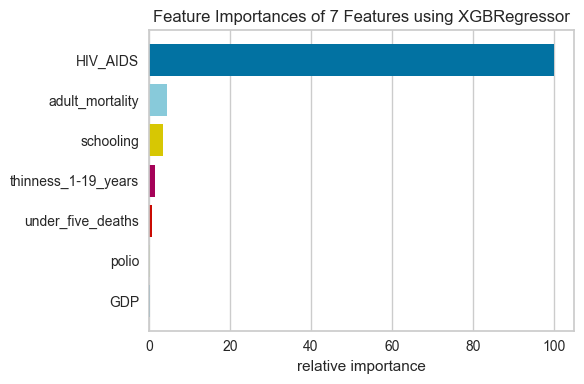

<AxesSubplot: title={'center': 'Feature Importances of 7 Features using XGBRegressor'}, xlabel='relative importance'>

In [119]:
from yellowbrick.model_selection import FeatureImportances

fig, ax = plt.subplots(figsize=(6, 4))
feature_imp_viz = FeatureImportances(xgbr_model)
feature_imp_viz.fit(X_train, y_train)
feature_imp_viz.poof()

### 11.5. LightGBM regression <a name="lightgbm"></a>

In [120]:
import lightgbm as lgb

# Initialize LGBMRegressor
lgbm_model = lgb.LGBMRegressor(random_state=42)

# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

# Apply model on unseen data
lgbm_reg_score = lgbm_model.score(X_test, y_test)
print('\n')
print(f"LGBM reg score (r2): {lgbm_reg_score:.5f}")

# Model evaluation
# Predict on the test set
y_pred11 = lgbm_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_lgbm_reg = mean_squared_error(y_test, y_pred11)
# Calculate mean absolute error value
mae_lgbm_reg = mean_absolute_error(y_test, y_pred11)

print(f"LGBM Mean Squared Error: {mse_lgbm_reg:.5f}")
print(f"LGBM Mean Absolute Error: {mae_lgbm_reg:.5f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 1653, number of used features: 7
[LightGBM] [Info] Start training from score 0.559500


LGBM reg score (r2): 0.95767
LGBM Mean Squared Error: 0.00196
LGBM Mean Absolute Error: 0.03068


View the tree,

In [121]:
from IPython.display import HTML

graph = lgb.create_tree_digraph(lgbm_model, tree_index=0, max_category_values=5)
HTML(graph._repr_image_svg_xml())

We can create a feature importance plot showing how many times a feature is used.

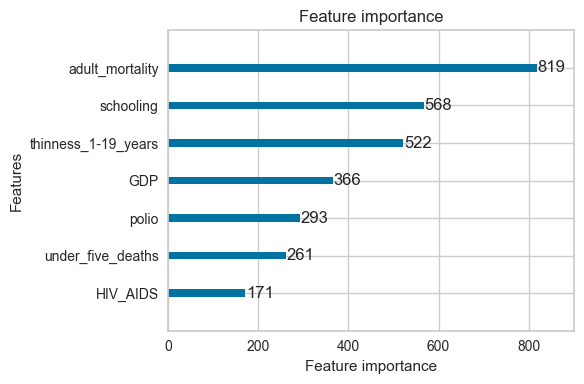

In [122]:
fig, ax = plt.subplots(figsize=(6, 4))
lgb.plot_importance(lgbm_model, ax=ax)
fig.tight_layout()

## 12. Feedforward neural network <a name="fnn"></a>

Using a multi-layer perceptron regressor with grid search

In [123]:
from sklearn.neural_network import MLPRegressor

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100), (200, 200)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create the MLP regressor
mlp_regressor = MLPRegressor(random_state=42, max_iter=1000)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
print(best_params)

# Get best model
mlp_reg_model = grid_search.best_estimator_

# Apply model on unseen data
mlp_reg_score = mlp_reg_model.score(X_test, y_test)
print(f"MLP reg score (r2): {svr_score:.5f}")

# Model evaluation
# Predict on the test set
y_pred12 = mlp_reg_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_mlp_reg = mean_squared_error(y_test, y_pred12)
# Calculate mean absolute error value
mae_mlp_reg = mean_absolute_error(y_test, y_pred12)

print(f"MLP Mean Squared Error: {mse_mlp_reg:.5f}")
print(f"MLP Mean Absolute Error: {mae_mlp_reg:.5f}")

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 200)}
MLP reg score (r2): 0.89302
MLP Mean Squared Error: 0.00384
MLP Mean Absolute Error: 0.04282


The RMSE value is low, which indicates that the model fits the data reasonably well and that the predictions are close to the actual values.

# 13. Results <a name="results"></a>

We can use our model coefficients assessment to find the results for our objectives,

**1. Key factors affecting life expectancy**

The most significant factors that impact life expectancy are adult mortality rate, under-five deaths, Polio immunization coverage, HIV/AIDS deaths in children, a country's GDP, thinness in minors and the mean years of schooling.

**2. Impact of vaccination coverage on life expectamcy**

- 'Hepatitis B': no strong impact (section 3.2. - B)
- 'Polio': notable positive impact (fifth most significant impact)
- 'Diphtheria': similar impact as Polio. Diphtheria and Polio have similar correlation values with life expectancy and the 2 variables show high collinearity (section 4.1.)

**3.Impact of nutritional indicators on life expectancy**

- 'BMI': column was removed due to unrealistic data
- 'thinness 1-19 years': negatively impacts life expectancy (fourth most significant impact)

**4. Impact of alcohol consumption on life expectancy**

- Relative importance is not as high as features used in the model
- Shows a moderate negative impact (section 4.1.)

**5. Impact of schooling on life expectancy**

- Impact is positive and significant. 'Schooling' has the largest model coefficient magnitude.

**6. Impact of GDP on life expectancy**

- Notable positive impact (sixth most significant impact)


# References

### Books

Harrison, M. (2019) *Machine Learning Pocket Reference - Working with Structured Data in Python.* O'REILLY.

Nield, T. (2022) *Essential Math for Data Science - Take Control of Your Data with Fundamental Linear Algebra, Probability and Statistics.* O'REILLY.

Grus, J. (2019) *Data Science from Scratch - First Principles with Python.* O'REILLY.

VanderPlas, J. (2017) *Python Data Science Handbook* O'REILLY.